# Notebook exploratoire

## Chargement des données

In [1]:
import pandas as pd
import numpy as np
import json as js
import seaborn as sn
import matplotlib.pyplot as plt
import ast

In [2]:
df15 = pd.read_csv('../archive/2015-building-energy-benchmarking.csv')
df16 = pd.read_csv('../archive/2016-building-energy-benchmarking.csv')

In [3]:
f15 = open('../archive/socrata_metadata_2015-building-energy-benchmarking.json')
f16 = open('../archive/socrata_metadata_2016-building-energy-benchmarking.json')
js15 = js.load(f15)
js16 = js.load(f16)

In [4]:
col15 = df15.columns
print("Format données année 2015 lignes/colonnes: ", df15.shape)
print("Format données année 2016 lignes/colonnes: ", df16.shape)

Format données année 2015 lignes/colonnes:  (3340, 47)
Format données année 2016 lignes/colonnes:  (3376, 46)


In [5]:
print("Le dataset 2015 contient des colonnes différentes du dataset 2016")
for c in df15.columns.difference(df16.columns):
    print("\t",c)

print()
print("Et réciproquement le dataset 2016 contient des colonnes que le dataset 2015 n'a pas")
for c in df16.columns.difference(df15.columns):
    print("\t",c)

Le dataset 2015 contient des colonnes différentes du dataset 2016
	 2010 Census Tracts
	 City Council Districts
	 Comment
	 GHGEmissions(MetricTonsCO2e)
	 GHGEmissionsIntensity(kgCO2e/ft2)
	 Location
	 OtherFuelUse(kBtu)
	 SPD Beats
	 Seattle Police Department Micro Community Policing Plan Areas
	 Zip Codes

Et réciproquement le dataset 2016 contient des colonnes que le dataset 2015 n'a pas
	 Address
	 City
	 Comments
	 GHGEmissionsIntensity
	 Latitude
	 Longitude
	 State
	 TotalGHGEmissions
	 ZipCode


* Il faut normaliser les colonnes pour lesquelles c'est possible

### Harmonisation des noms de colonnes

* Pour les colonnes concernant GHG :

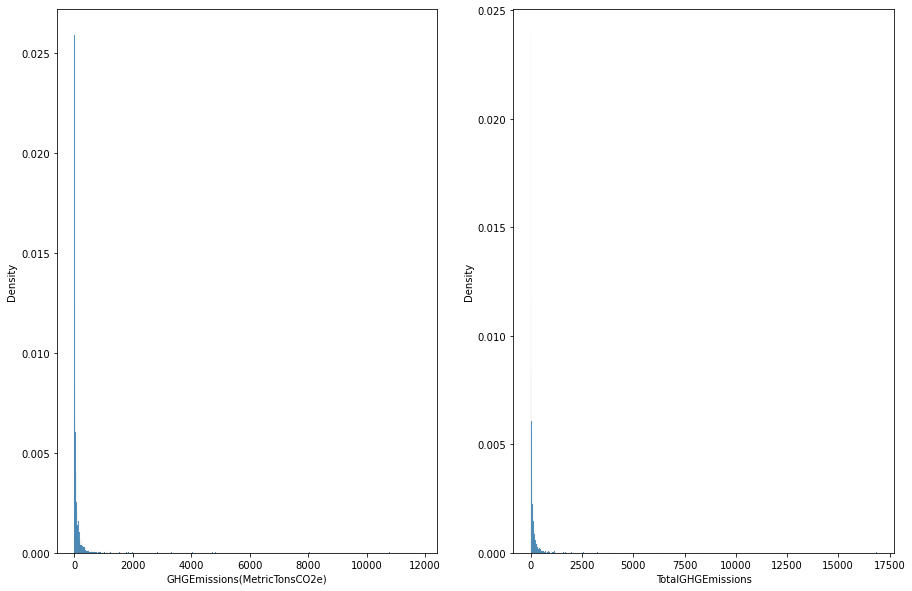

In [6]:
fig, ax= plt.subplots(1,2,figsize=(15,10))
_ = sn.histplot(data=df15, x="GHGEmissions(MetricTonsCO2e)", stat='density', ax=ax[0])
_ = sn.histplot(data=df16,x="TotalGHGEmissions", stat='density',ax=ax[1])

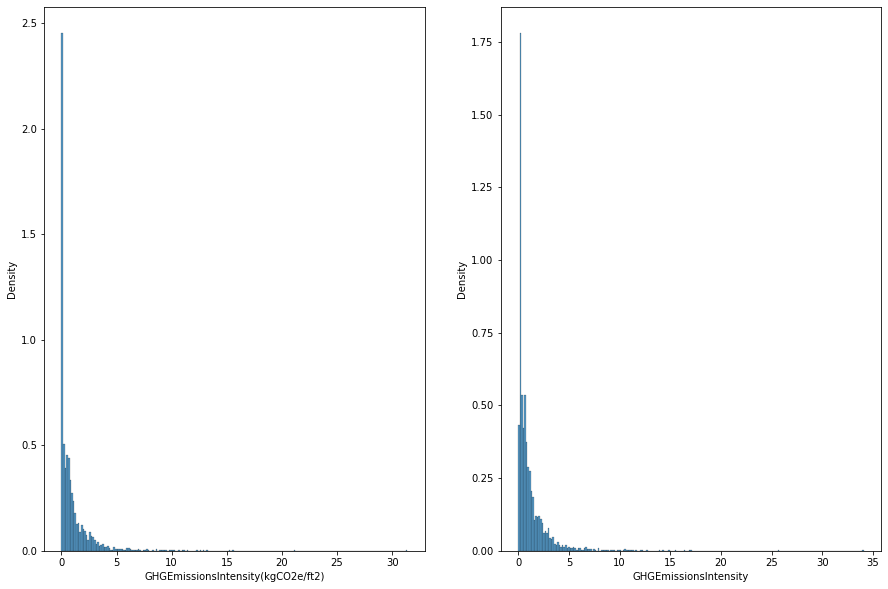

In [7]:
fig, ax= plt.subplots(1,2,figsize=(15,10))
_ = sn.histplot(data=df15, x="GHGEmissionsIntensity(kgCO2e/ft2)", stat='density', ax=ax[0])
_ = sn.histplot(data=df16,x="GHGEmissionsIntensity", stat='density',ax=ax[1])

Les valeurs de ces colonnes suivent la même distribution, ce sont les mêmes variables.

In [8]:
# On retire les outliers preconisés par le jeu de données
df16 = df16[df16['Outlier'].isnull()]
df15 = df15[df15['Outlier'].isnull()]
print("Format données année 2015 lignes/colonnes: ", df15.shape)
print("Format données année 2016 lignes/colonnes: ", df16.shape)

Format données année 2015 lignes/colonnes:  (3256, 47)
Format données année 2016 lignes/colonnes:  (3344, 46)


In [9]:
df16 = df16.rename(columns={"Comments":"Comment", "ZipCode":"Zip Codes", "GHGEmissionsIntensity":"GHGEmissionsIntensity(kgCO2e/ft2)", "TotalGHGEmissions":"GHGEmissions(MetricTonsCO2e)"})

In [10]:
df15['Location'].head

<bound method NDFrame.head of 0       {'latitude': '47.61219025', 'longitude': '-122...
1       {'latitude': '47.61310583', 'longitude': '-122...
2       {'latitude': '47.61334897', 'longitude': '-122...
4       {'latitude': '47.6137544', 'longitude': '-122....
5       {'latitude': '47.6164389', 'longitude': '-122....
                              ...                        
3335    {'latitude': '47.59950256', 'longitude': '-122...
3336    {'latitude': '47.65752471', 'longitude': '-122...
3337    {'latitude': '47.61649845', 'longitude': '-122...
3338    {'latitude': '47.68396954', 'longitude': '-122...
3339    {'latitude': '47.68396954', 'longitude': '-122...
Name: Location, Length: 3256, dtype: object>

In [11]:
df16['Latitude'].head()

0    47.61220
1    47.61317
2    47.61393
3    47.61412
4    47.61375
Name: Latitude, dtype: float64

In [12]:
df15['Location'] = df15['Location'].apply(ast.literal_eval) # transforme le string en dictionnaire

In [13]:
tmp = df15['Location'].apply(pd.Series)

In [14]:
tmp.head()

,latitude,longitude,human_address
0,47.61219025,-122.33799744,"{""address"": ""405 OLIVE WAY"", ""city"": ""SEATTLE""..."
1,47.61310583,-122.33335756,"{""address"": ""724 PINE ST"", ""city"": ""SEATTLE"", ..."
2,47.61334897,-122.33769944,"{""address"": ""1900 5TH AVE"", ""city"": ""SEATTLE"",..."
4,47.6137544,-122.3409238,"{""address"": ""401 LENORA ST"", ""city"": ""SEATTLE""..."
5,47.6164389,-122.33676431,"{""address"": ""810 VIRGINIA ST"", ""city"": ""SEATTL..."


In [15]:
df15 = pd.concat([df15.drop(['Location'],axis=1), tmp], axis=1)

In [16]:
df15 = df15.rename(columns={"latitude":"Latitude", "longitude":"Longitude", "human_address":"Address"})

In [17]:
tmp = df15['Address'].apply(ast.literal_eval).apply(pd.Series)

In [18]:
df15 = pd.concat([df15.drop(['Address'],axis=1), tmp], axis=1)

In [19]:
df15 = df15.rename(columns={"address":"Address","city":"City", "state":"State"})

* Toutes les variables communes aux deux dataset portent le même nom à présent

In [20]:
print("Le dataset 2015 contient des colonnes différentes du dataset 2016")
for c in df15.columns.difference(df16.columns):
    print("\t",c)

print()
print("Et réciproquement le dataset 2016 contient des colonnes que le dataset 2015 n'a pas")
for c in df16.columns.difference(df15.columns):
    if len(df16.columns.difference(df15.columns)[0])==0:
        print("le dataset de 2016 ne contient aucune colonne différente de celui de 2015")
    else :
        print("\t",c)

Le dataset 2015 contient des colonnes différentes du dataset 2016
	 2010 Census Tracts
	 City Council Districts
	 OtherFuelUse(kBtu)
	 SPD Beats
	 Seattle Police Department Micro Community Policing Plan Areas
	 zip

Et réciproquement le dataset 2016 contient des colonnes que le dataset 2015 n'a pas


In [21]:
len(df16.columns.difference(df15.columns))==0

True

In [22]:
diff = df15.columns.difference(df16.columns)
df15 = df15.drop(diff,axis=1)

In [23]:
df15.shape

(3256, 46)

In [24]:
df16.shape

(3344, 46)

In [25]:
joint = [df15,df16]
df = pd.concat(joint,ignore_index=True)

In [26]:
print("Une fois fusionné le jeu de données est composé de {} colonnes et {} lignes.".format(df.shape[1],df.shape[0]))

Une fois fusionné le jeu de données est composé de 46 colonnes et 6600 lignes.


## Suppression données ne concernant pas la mission

In [27]:
df['BuildingType'].value_counts()

NonResidential          2877
Multifamily LR (1-4)    2002
Multifamily MR (5-9)    1115
Multifamily HR (10+)     213
SPS-District K-12        194
Nonresidential COS       152
Campus                    46
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [28]:
df.shape

(6600, 46)

In [29]:
df = df[~df['BuildingType'].str.contains("Multifamily")]

In [30]:
df['BuildingType'].value_counts()

NonResidential        2877
SPS-District K-12      194
Nonresidential COS     152
Campus                  46
Nonresidential WA        1
Name: BuildingType, dtype: int64

In [31]:
corr = {'Nonresidential COS':'NonResidential', 'Nonresidential WA':'NonResidential'}
df['BuildingType'].replace(corr, inplace=True)

## Données manquantes

#### Colonnes

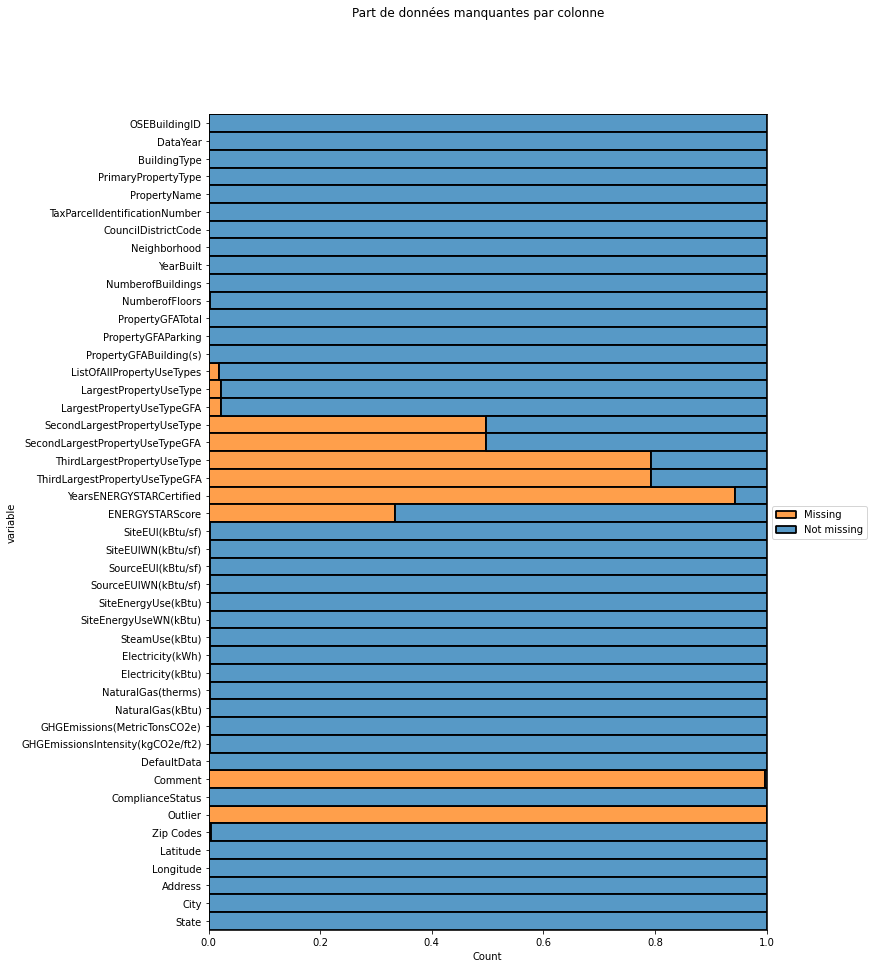

In [32]:
fig= plt.figure(figsize=(10,15))
plt.suptitle("Part de données manquantes par colonne")

_ = sn.histplot(data=df.isna().melt(value_name="missing"), y="variable", hue="missing", multiple="fill")
plt.legend(labels=["Missing","Not missing"], loc="center left",bbox_to_anchor=(1, 0.5))

In [33]:
print("missing values")
for c in df:
    per = 100*df[c].isnull().sum()/df.shape[0]
    if per>35:
        print("\t", c, " : ",round(per,2),"%")
        df = df.drop([c],axis=1)

missing values
	 SecondLargestPropertyUseType  :  49.72 %
	 SecondLargestPropertyUseTypeGFA  :  49.72 %
	 ThirdLargestPropertyUseType  :  79.27 %
	 ThirdLargestPropertyUseTypeGFA  :  79.27 %
	 YearsENERGYSTARCertified  :  94.28 %
	 Comment  :  99.69 %
	 Outlier  :  100.0 %


In [34]:
print("On conserve les colonnes qui contiennent plus de 75% de données. Il nous reste à présent {} colonnes.".format(df.shape[1]))

On conserve les colonnes qui contiennent plus de 75% de données. Il nous reste à présent 39 colonnes.


##### Doublons

Nous voulons déterminer si des colonnes sont dupliquées, il faut harmoniser le contenu des colonnes pour pouvoir les comparer.

In [35]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [36]:
numtype = ['int64','float64']
num = df.select_dtypes(include=numtype).columns

In [37]:
cat = df.columns.difference(num)
cats = df[cat]

In [38]:
pd.set_option('display.max_columns', None)

In [39]:
df[cat].head()

,Address,BuildingType,City,ComplianceStatus,DefaultData,LargestPropertyUseType,Latitude,ListOfAllPropertyUseTypes,Longitude,Neighborhood,PrimaryPropertyType,PropertyName,State,TaxParcelIdentificationNumber
0,405 OLIVE WAY,NonResidential,SEATTLE,Compliant,No,Hotel,47.61219025,Hotel,-122.33799744,DOWNTOWN,Hotel,MAYFLOWER PARK HOTEL,WA,659000030
1,724 PINE ST,NonResidential,SEATTLE,Compliant,No,Hotel,47.61310583,"Hotel, Parking, Restaurant",-122.33335756,DOWNTOWN,Hotel,PARAMOUNT HOTEL,WA,659000220
2,1900 5TH AVE,NonResidential,SEATTLE,Compliant,Yes,Hotel,47.61334897,"Hotel, Parking, Swimming Pool",-122.33769944,DOWNTOWN,Hotel,WESTIN HOTEL,WA,659000475
3,401 LENORA ST,NonResidential,SEATTLE,Compliant,No,Hotel,47.6137544,"Hotel, Parking, Swimming Pool",-122.3409238,DOWNTOWN,Hotel,WARWICK SEATTLE HOTEL,WA,659000970
4,810 VIRGINIA ST,NonResidential,SEATTLE,Compliant,No,Police Station,47.6164389,Police Station,-122.33676431,DOWNTOWN,Other,WEST PRECINCT (SEATTLE POLICE),WA,660000560


In [40]:
df['DefaultData'].value_counts()

False    1565
No       1431
Yes       187
True       86
Name: DefaultData, dtype: int64

In [41]:
corr = {False:'No', True:'Yes'}
df['DefaultData'].replace(corr, inplace=True)
df['DefaultData'].value_counts()

No     2996
Yes     273
Name: DefaultData, dtype: int64

In [42]:
df['ComplianceStatus'].value_counts()

Compliant                       3167
Error - Correct Default Data      86
Missing Data                      14
Non-Compliant                      3
Name: ComplianceStatus, dtype: int64

In [43]:
df['State'].value_counts()

WA    3270
Name: State, dtype: int64

In [44]:
df = df.drop('State',axis=1)

In [45]:
df['City'].value_counts()

Seattle    1651
SEATTLE    1619
Name: City, dtype: int64

In [46]:
df = df.drop('City',axis=1)

In [47]:
df['Neighborhood'].value_counts()

DOWNTOWN                  713
GREATER DUWAMISH          679
MAGNOLIA / QUEEN ANNE     294
LAKE UNION                291
EAST                      241
NORTHEAST                 238
NORTHWEST                 169
BALLARD                   132
NORTH                     123
CENTRAL                   101
SOUTHEAST                  92
DELRIDGE                   87
SOUTHWEST                  80
North                       9
Ballard                     6
Central                     5
Northwest                   5
Delridge                    4
DELRIDGE NEIGHBORHOODS      1
Name: Neighborhood, dtype: int64

In [48]:
corr = {'DOWNTOWN':'Downtown', 'SOUTHEAST':'Southeast', 'NORTHEAST':'Northeast', 'EAST':'East', 'CENTRAL':'Central', 'NORTH':'North',
       'MAGNOLIA / QUEEN ANNE':'Magnolia / Queen Anne', 'LAKE UNION':'Lake Union', 'GREATER DUWAMISH':'Greater Duwamish',
       'BALLARD':'Ballard', 'NORTHWEST':'Northwest', 'SOUTHWEST':'Southwest', 'DELRIDGE':'Delridge',
       'DELRIDGE NEIGHBORHOODS':'Delridge'}
df['Neighborhood'].replace(corr, inplace=True)

In [49]:
df['Neighborhood'].value_counts()

Downtown                 713
Greater Duwamish         679
Magnolia / Queen Anne    294
Lake Union               291
East                     241
Northeast                238
Northwest                174
Ballard                  138
North                    132
Central                  106
Delridge                  92
Southeast                 92
Southwest                 80
Name: Neighborhood, dtype: int64

In [50]:
df['PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    572
Other                          499
Large Office                   331
K-12 School                    271
Mixed Use Property             220
Warehouse                      187
Non-Refrigerated Warehouse     187
Retail Store                   185
Hotel                          146
Worship Facility               141
Medical Office                  82
Distribution Center             55
Distribution Center\n           51
Supermarket / Grocery Store     40
Senior Care Community           39
Supermarket/Grocery Store       36
Self-Storage Facility           29
Self-Storage Facility\n         27
Refrigerated Warehouse          25
University                      24
Residence Hall                  21
College/University              21
Hospital                        20
Residence Hall/Dormitory        15
Restaurant                      13
Restaurant\n                    11
Laboratory                      11
Low-Rise Multifamily             4
SPS-District K-12   

In [51]:
df = df[~df['PrimaryPropertyType'].str.contains("Multifamily")]

In [52]:
corr= {'Self-Storage Facility\n':'Self-Storage Facility', 'Distribution Center\n':'Distribution Center', 'Restaurant\n':'Restaurant', 'Supermarket / Grocery Store':'Supermarket/Grocery Store', 
       'University':'College/University', 'Residence Hall':'Residence Hall/Dormitory'}
df['PrimaryPropertyType'].replace(corr,inplace=True)

In [53]:
df['LargestPropertyUseType'].value_counts()

Office                                                  946
Non-Refrigerated Warehouse                              393
K-12 School                                             271
Other                                                   195
Retail Store                                            192
Hotel                                                   141
Worship Facility                                        139
Distribution Center                                     106
Medical Office                                           84
Supermarket/Grocery Store                                78
Parking                                                  56
Self-Storage Facility                                    54
Other - Recreation                                       51
College/University                                       44
Other - Entertainment/Public Assembly                    41
Senior Care Community                                    39
Residence Hall/Dormitory                

In [54]:
df['LargestPropertyUseType'].replace({np.nan:'Unknown'},inplace=True)

In [55]:
df = df[~df['LargestPropertyUseType'].str.contains("Multifamily")]

In [56]:
df['BuildingType'].value_counts()

NonResidential       3010
SPS-District K-12     194
Campus                 44
Name: BuildingType, dtype: int64

In [57]:
types = [type(i) for i in df['Latitude']]
set(types)

{float, str}

In [58]:
ws = np.where(np.array(types)==str)[0]
wi = np.where(np.array(types)==float)[0]
print("nombre de str : ", len(ws))
print("nombre de float : ", len(wi))

nombre de str :  1608
nombre de float :  1640


In [59]:
df['Latitude'] = df['Latitude'].astype(float)

In [60]:
types = [type(i) for i in df['Longitude']]
set(types)

{float, str}

In [61]:
df['Longitude'] = df['Longitude'].astype(float)

In [62]:
mn = df['NumberofFloors'].mean()
print(mn)
df['NumberofFloors'].replace({np.nan:mn}, inplace=True)

df['NumberofFloors'] = df['NumberofFloors'].astype(int)

4.12037037037037


In [63]:
types = [type(i) for i in df['TaxParcelIdentificationNumber']]
set(types)

{float, str}

In [64]:
loc = df.loc[df['TaxParcelIdentificationNumber'].str.contains("and") == True]
loc
df = df.drop(loc.index)

In [65]:
loc = df.loc[df['TaxParcelIdentificationNumber'].str.contains("-") == True]

df = df.drop(loc.index)

In [66]:
df['TaxParcelIdentificationNumber'] = df['TaxParcelIdentificationNumber'].astype(float)

In [67]:
numtype = ['int64','float64']
num = df.select_dtypes(include=numtype).columns

In [68]:
cat = df.columns.difference(num)
cats = df[cat]

In [69]:
duplicates = set()
for x in range(df[num].shape[1]):
    col = df[num].iloc[:,x]
    for y in range(x+1, df[num].shape[1]):
        othercol = df[num].iloc[:,y]
        if col.equals(othercol):
            duplicates.add(df[num].columns.values[y])
duplicates

set()

In [70]:
df[cat].head()

,Address,BuildingType,ComplianceStatus,DefaultData,LargestPropertyUseType,ListOfAllPropertyUseTypes,Neighborhood,NumberofFloors,PrimaryPropertyType,PropertyName
0,405 OLIVE WAY,NonResidential,Compliant,No,Hotel,Hotel,Downtown,12,Hotel,MAYFLOWER PARK HOTEL
1,724 PINE ST,NonResidential,Compliant,No,Hotel,"Hotel, Parking, Restaurant",Downtown,11,Hotel,PARAMOUNT HOTEL
2,1900 5TH AVE,NonResidential,Compliant,Yes,Hotel,"Hotel, Parking, Swimming Pool",Downtown,41,Hotel,WESTIN HOTEL
3,401 LENORA ST,NonResidential,Compliant,No,Hotel,"Hotel, Parking, Swimming Pool",Downtown,18,Hotel,WARWICK SEATTLE HOTEL
4,810 VIRGINIA ST,NonResidential,Compliant,No,Police Station,Police Station,Downtown,2,Other,WEST PRECINCT (SEATTLE POLICE)


In [71]:
cat_features = ['BuildingType', 'LargestPropertyUseType', 'Neighborhood', 'PrimaryPropertyType']

In [72]:
df['PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    572
Other                          499
Large Office                   331
K-12 School                    271
Mixed Use Property             201
Warehouse                      187
Non-Refrigerated Warehouse     187
Retail Store                   182
Hotel                          146
Worship Facility               141
Distribution Center            106
Medical Office                  82
Supermarket/Grocery Store       76
Self-Storage Facility           56
College/University              45
Senior Care Community           39
Residence Hall/Dormitory        36
Refrigerated Warehouse          25
Restaurant                      24
Hospital                        20
Laboratory                      11
SPS-District K-12                4
Office                           3
Name: PrimaryPropertyType, dtype: int64

***

#### Lignes

In [73]:
emptyrows = df.isnull().sum(axis=1)

In [74]:
df.shape

(3244, 37)

In [75]:
tooempty = np.where(emptyrows>=df.shape[1]*0.25)[0]
tooempty = [i for i in tooempty]
tooempty

[647, 920, 1201, 1316, 1319, 2169, 3007]

In [76]:
df = df.drop(df.index[tooempty])

In [77]:
print("Nous avons retiré {} lignes, car il leur manquait plus de 25% de données. Il reste {} lignes à exploiter.".format(len(tooempty),df.shape[0]))

Nous avons retiré 7 lignes, car il leur manquait plus de 25% de données. Il reste 3237 lignes à exploiter.


In [78]:
df[num].head()

,OSEBuildingID,DataYear,TaxParcelIdentificationNumber,CouncilDistrictCode,YearBuilt,NumberofBuildings,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Zip Codes,Latitude,Longitude
0,1,2015,659000030.0,7,1927,1.0,88434,0,88434,88434.0,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,249.43,2.64,18081.0,47.612190,-122.337997
1,2,2015,659000220.0,7,1996,1.0,103566,15064,88502,83880.0,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,263.51,2.38,18081.0,47.613106,-122.333358
2,3,2015,659000475.0,7,1969,1.0,961990,0,961990,757243.0,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,2061.48,1.92,18081.0,47.613349,-122.337699
3,8,2015,659000970.0,7,1980,1.0,119890,12460,107430,123445.0,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,507.70,4.02,19576.0,47.613754,-122.340924
4,9,2015,660000560.0,7,1999,1.0,97288,37198,60090,88830.0,NaN,135.7,146.9,313.5,321.6,12051984.0,13045258.0,0.0,2130921.0,7271004.0,47813.0,4781283.0,304.62,2.81,19576.0,47.616439,-122.336764


In [79]:
df= df.dropna(subset=['TaxParcelIdentificationNumber'])

In [80]:
df['TaxParcelIdentificationNumber'] = df['TaxParcelIdentificationNumber'].astype(np.int64)

In [81]:
df[df['TaxParcelIdentificationNumber'] == 1985200003]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,ComplianceStatus,Zip Codes,Latitude,Longitude,Address
67,103,2015,NonResidential,Other,KEY ARENA - SEATTLE CENTER,1985200003,7,Magnolia / Queen Anne,1962,1.0,1,129000,0,129000,Other,Other,368000.0,NaN,79.700000,78.700000,167.700000,167.700000,29337400.0,28974828.0,8560000.00,4194724.000,14312992.0,0.000000,0.0,760.51,5.42,No,Compliant,18390.0,47.621241,-122.353432,305 HARRISON ST
68,104,2015,NonResidential,Other,BAGLEY WRIGHT THEATER - SEATTLE CENTER,1985200003,7,Magnolia / Queen Anne,1962,1.0,1,91213,0,91213,Other,Other,65000.0,NaN,78.000000,85.900000,201.200000,216.100000,5069854.0,5580583.0,1270000.00,1061505.000,3622005.0,0.000000,0.0,123.28,1.18,No,Compliant,18390.0,47.621241,-122.353432,305 HARRISON ST
1255,21418,2015,NonResidential,Other,NORTHWEST ROOMS - SEATTLE CENTER,1985200003,7,Magnolia / Queen Anne,1961,1.0,1,26000,0,26000,Other,Other,49847.0,NaN,78.100000,84.100000,193.900000,201.000000,3895403.0,4192866.0,1326000.00,753049.000,2569510.0,0.000000,0.0,120.26,4.20,No,Compliant,18390.0,47.621241,-122.353432,305 HARRISON ST
3325,103,2016,NonResidential,Other,Key Arena,1985200003,7,Magnolia / Queen Anne,1962,1.0,1,389000,0,389000,Other,Other,368000.0,NaN,64.300003,64.500000,151.600006,152.100006,23658978.0,23736924.0,6093150.00,4226010.000,14419146.0,6886.799805,688680.0,607.41,1.56,No,Compliant,98109.0,47.622080,-122.353980,334 1st Ave. N
3326,104,2016,NonResidential,Other,Bagley Wright Theatre,1985200003,7,Magnolia / Queen Anne,1962,1.0,1,91213,0,91213,Other,Other,65000.0,NaN,125.199997,125.900002,261.700012,265.399994,8141155.5,8181881.0,4120130.00,1100268.125,3754115.0,0.000000,0.0,344.20,3.77,No,Compliant,98109.0,47.622080,-122.353980,151 Mercer St.
4519,21418,2016,NonResidential,Other,Northwest Rooms,1985200003,7,Magnolia / Queen Anne,1961,1.0,1,26000,0,26000,Other,Other,49847.0,NaN,105.900002,114.699997,250.899994,261.600006,5277482.5,5719698.0,2097789.75,931914.625,3179693.0,0.000000,0.0,184.09,7.08,No,Compliant,98109.0,47.622080,-122.353980,394 1st Ave. N.


In [82]:
tmp0 = df[df[['TaxParcelIdentificationNumber']].duplicated()]
tmp0.shape
tmp0

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,ComplianceStatus,Zip Codes,Latitude,Longitude,Address
68,104,2015,NonResidential,Other,BAGLEY WRIGHT THEATER - SEATTLE CENTER,1985200003,7,Magnolia / Queen Anne,1962,1.0,1,91213,0,91213,Other,Other,65000.0,NaN,78.000000,85.900000,201.200000,216.100000,5069854.00,5.580583e+06,1270000.0,1.061505e+06,3.622005e+06,0.00000,0.000,123.28,1.18,No,Compliant,18390.0,47.621241,-122.353432,305 HARRISON ST
73,112,2015,NonResidential,Other,MCCAW HALL - SEATTLE CENTER,1988200700,7,Magnolia / Queen Anne,1928,1.0,2,262048,0,262048,Other,Other,296000.0,NaN,70.400000,70.400000,174.100000,179.700000,20828130.00,2.084516e+07,3900000.0,4.098221e+06,1.398371e+07,0.00000,0.000,398.51,1.29,No,Compliant,18390.0,47.623881,-122.349970,225 MERCER ST
111,180,2015,NonResidential,Other,UNION GOSPEL MISSION ASSN / HOPE PLACE,7378600265,2,Greater Duwamish,2009,1.0,5,89821,0,89821,"Food Service, Office, Other - Lodging/Residential",Other - Lodging/Residential,46483.0,NaN,22.700000,26.300000,25.300000,29.300000,2017694.00,2.337736e+06,0.0,1.901500e+04,6.488000e+04,19528.00000,1952816.000,104.17,1.16,No,Compliant,18800.0,47.538300,-122.284053,3802 S OTHELLO ST
133,224,2015,NonResidential,Retail Store,WESTWOOD VILLAGE - BLDG B (Includes QFC),3624039009,1,Delridge,1965,1.0,1,67745,0,67745,Retail Store,Retail Store,67782.0,31.0,141.100000,152.200000,241.100000,250.600000,9560965.00,1.031556e+07,0.0,8.839320e+05,3.016102e+06,65450.00000,6544988.000,368.63,5.25,No,Compliant,19581.0,47.521317,-122.366897,2600 SW BARTON ST
154,248,2015,NonResidential,Non-Refrigerated Warehouse,CITY LIGHT - SOUTH SERVICE CENTER BLDG B,7666205660,2,Greater Duwamish,1965,1.0,2,50000,0,50000,"Non-Refrigerated Warehouse, Office, Other, Oth...",Non-Refrigerated Warehouse,40831.0,NaN,58.500000,69.000000,183.800000,216.800000,4116805.00,4.855148e+06,0.0,1.206566e+06,4.116974e+06,0.00000,0.000,28.70,0.22,No,Compliant,19584.0,47.571258,-122.331498,400 S SPOKANE ST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6583,50101,2016,NonResidential,College/University,Burke Museum,1625049001,4,Northeast,1962,1.0,1,68072,0,68072,College/University,College/University,68916.0,NaN,46.200001,46.200001,144.899994,144.899994,3180819.25,3.180819e+06,0.0,9.322447e+05,3.180819e+06,0.00000,0.000,22.17,0.33,No,Compliant,98195.0,47.661270,-122.312560,4331 Memorial Way NE
6584,50196,2016,NonResidential,Mixed Use Property,Northgate Community Center,2926049431,5,North,2005,1.0,1,20616,0,20616,"Fitness Center/Health Club/Gym, Office, Other ...",Other - Recreation,9900.0,NaN,30.900000,30.900000,97.000000,97.000000,636965.50,6.369655e+05,0.0,1.866839e+05,6.369655e+05,0.00000,0.000,4.44,0.22,No,Compliant,NaN,47.705410,-122.322320,10510 5th Ave NE
6591,50212,2016,NonResidential,Other,Conservatory Campus,2925049087,3,East,1912,1.0,1,23445,0,23445,Other - Recreation,Other - Recreation,23445.0,NaN,254.899994,286.500000,380.100006,413.200012,5976246.00,6.716330e+06,0.0,3.695398e+05,1.260870e+06,47153.75781,4715375.781,259.22,11.06,No,Compliant,NaN,47.632280,-122.315740,1400 E Galer St
6592,50219,2016,NonResidential,Mixed Use Property,Garfield Community Center,7544800245,3,Central,1994,1.0,1,20050,0,20050,"Fitness Center/Health Club/Gym, Office, Other ...",Other - Recreation,8108.0,NaN,90.400002,99.400002,175.199997,184.600006,1813404

In [83]:
tmp = df[df[['TaxParcelIdentificationNumber','PropertyName', 'Address', 'YearBuilt']].duplicated()]
print(tmp.shape)
tmp.head(2)

(24, 37)


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,ComplianceStatus,Zip Codes,Latitude,Longitude,Address
2097,24536,2015,NonResidential,Non-Refrigerated Warehouse,CLOVERDALE BUSINESS PARK,3224049012,1,Greater Duwamish,1979,1.0,1,31360,0,31360,"Non-Refrigerated Warehouse, Retail Store",Non-Refrigerated Warehouse,29640.0,NaN,41.1,49.1,83.8,92.2,1279570.0,1526885.0,0.0,177230.0,604734.0,6749.0,674861.0,40.06,1.19,No,Compliant,18388.0,47.525932,-122.33084,309 S CLOVERDALE ST
2098,24537,2015,NonResidential,Non-Refrigerated Warehouse,CLOVERDALE BUSINESS PARK,3224049012,1,Greater Duwamish,1979,1.0,1,33320,0,33320,"Non-Refrigerated Warehouse, Office",Non-Refrigerated Warehouse,32200.0,NaN,67.5,75.7,144.2,152.8,2254220.0,2528550.0,0.0,343447.0,1171888.0,10824.0,1082380.0,65.65,1.82,No,Compliant,18388.0,47.525932,-122.33084,309 S CLOVERDALE ST


In [84]:
kk = tmp0['TaxParcelIdentificationNumber'].values[0]

In [85]:
df[df['TaxParcelIdentificationNumber'] == kk]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,ComplianceStatus,Zip Codes,Latitude,Longitude,Address
67,103,2015,NonResidential,Other,KEY ARENA - SEATTLE CENTER,1985200003,7,Magnolia / Queen Anne,1962,1.0,1,129000,0,129000,Other,Other,368000.0,NaN,79.700000,78.700000,167.700000,167.700000,29337400.0,28974828.0,8560000.00,4194724.000,14312992.0,0.000000,0.0,760.51,5.42,No,Compliant,18390.0,47.621241,-122.353432,305 HARRISON ST
68,104,2015,NonResidential,Other,BAGLEY WRIGHT THEATER - SEATTLE CENTER,1985200003,7,Magnolia / Queen Anne,1962,1.0,1,91213,0,91213,Other,Other,65000.0,NaN,78.000000,85.900000,201.200000,216.100000,5069854.0,5580583.0,1270000.00,1061505.000,3622005.0,0.000000,0.0,123.28,1.18,No,Compliant,18390.0,47.621241,-122.353432,305 HARRISON ST
1255,21418,2015,NonResidential,Other,NORTHWEST ROOMS - SEATTLE CENTER,1985200003,7,Magnolia / Queen Anne,1961,1.0,1,26000,0,26000,Other,Other,49847.0,NaN,78.100000,84.100000,193.900000,201.000000,3895403.0,4192866.0,1326000.00,753049.000,2569510.0,0.000000,0.0,120.26,4.20,No,Compliant,18390.0,47.621241,-122.353432,305 HARRISON ST
3325,103,2016,NonResidential,Other,Key Arena,1985200003,7,Magnolia / Queen Anne,1962,1.0,1,389000,0,389000,Other,Other,368000.0,NaN,64.300003,64.500000,151.600006,152.100006,23658978.0,23736924.0,6093150.00,4226010.000,14419146.0,6886.799805,688680.0,607.41,1.56,No,Compliant,98109.0,47.622080,-122.353980,334 1st Ave. N
3326,104,2016,NonResidential,Other,Bagley Wright Theatre,1985200003,7,Magnolia / Queen Anne,1962,1.0,1,91213,0,91213,Other,Other,65000.0,NaN,125.199997,125.900002,261.700012,265.399994,8141155.5,8181881.0,4120130.00,1100268.125,3754115.0,0.000000,0.0,344.20,3.77,No,Compliant,98109.0,47.622080,-122.353980,151 Mercer St.
4519,21418,2016,NonResidential,Other,Northwest Rooms,1985200003,7,Magnolia / Queen Anne,1961,1.0,1,26000,0,26000,Other,Other,49847.0,NaN,105.900002,114.699997,250.899994,261.600006,5277482.5,5719698.0,2097789.75,931914.625,3179693.0,0.000000,0.0,184.09,7.08,No,Compliant,98109.0,47.622080,-122.353980,394 1st Ave. N.


##### Doublons

In [86]:
ind = df.sort_values('DataYear').drop_duplicates(['TaxParcelIdentificationNumber'], keep='last').index
df.shape

(3236, 37)

In [87]:
df = df.loc[ind,:]
df.shape

(1595, 37)

In [88]:
print("Il reste au total {} lignes pour {} colonnes".format(df.shape[0],df.shape[1]))

Il reste au total 1595 lignes pour 37 colonnes


In [89]:
df.value_counts('DataYear')

DataYear
2016    1556
2015      39
dtype: int64

### Valeurs aberrantes

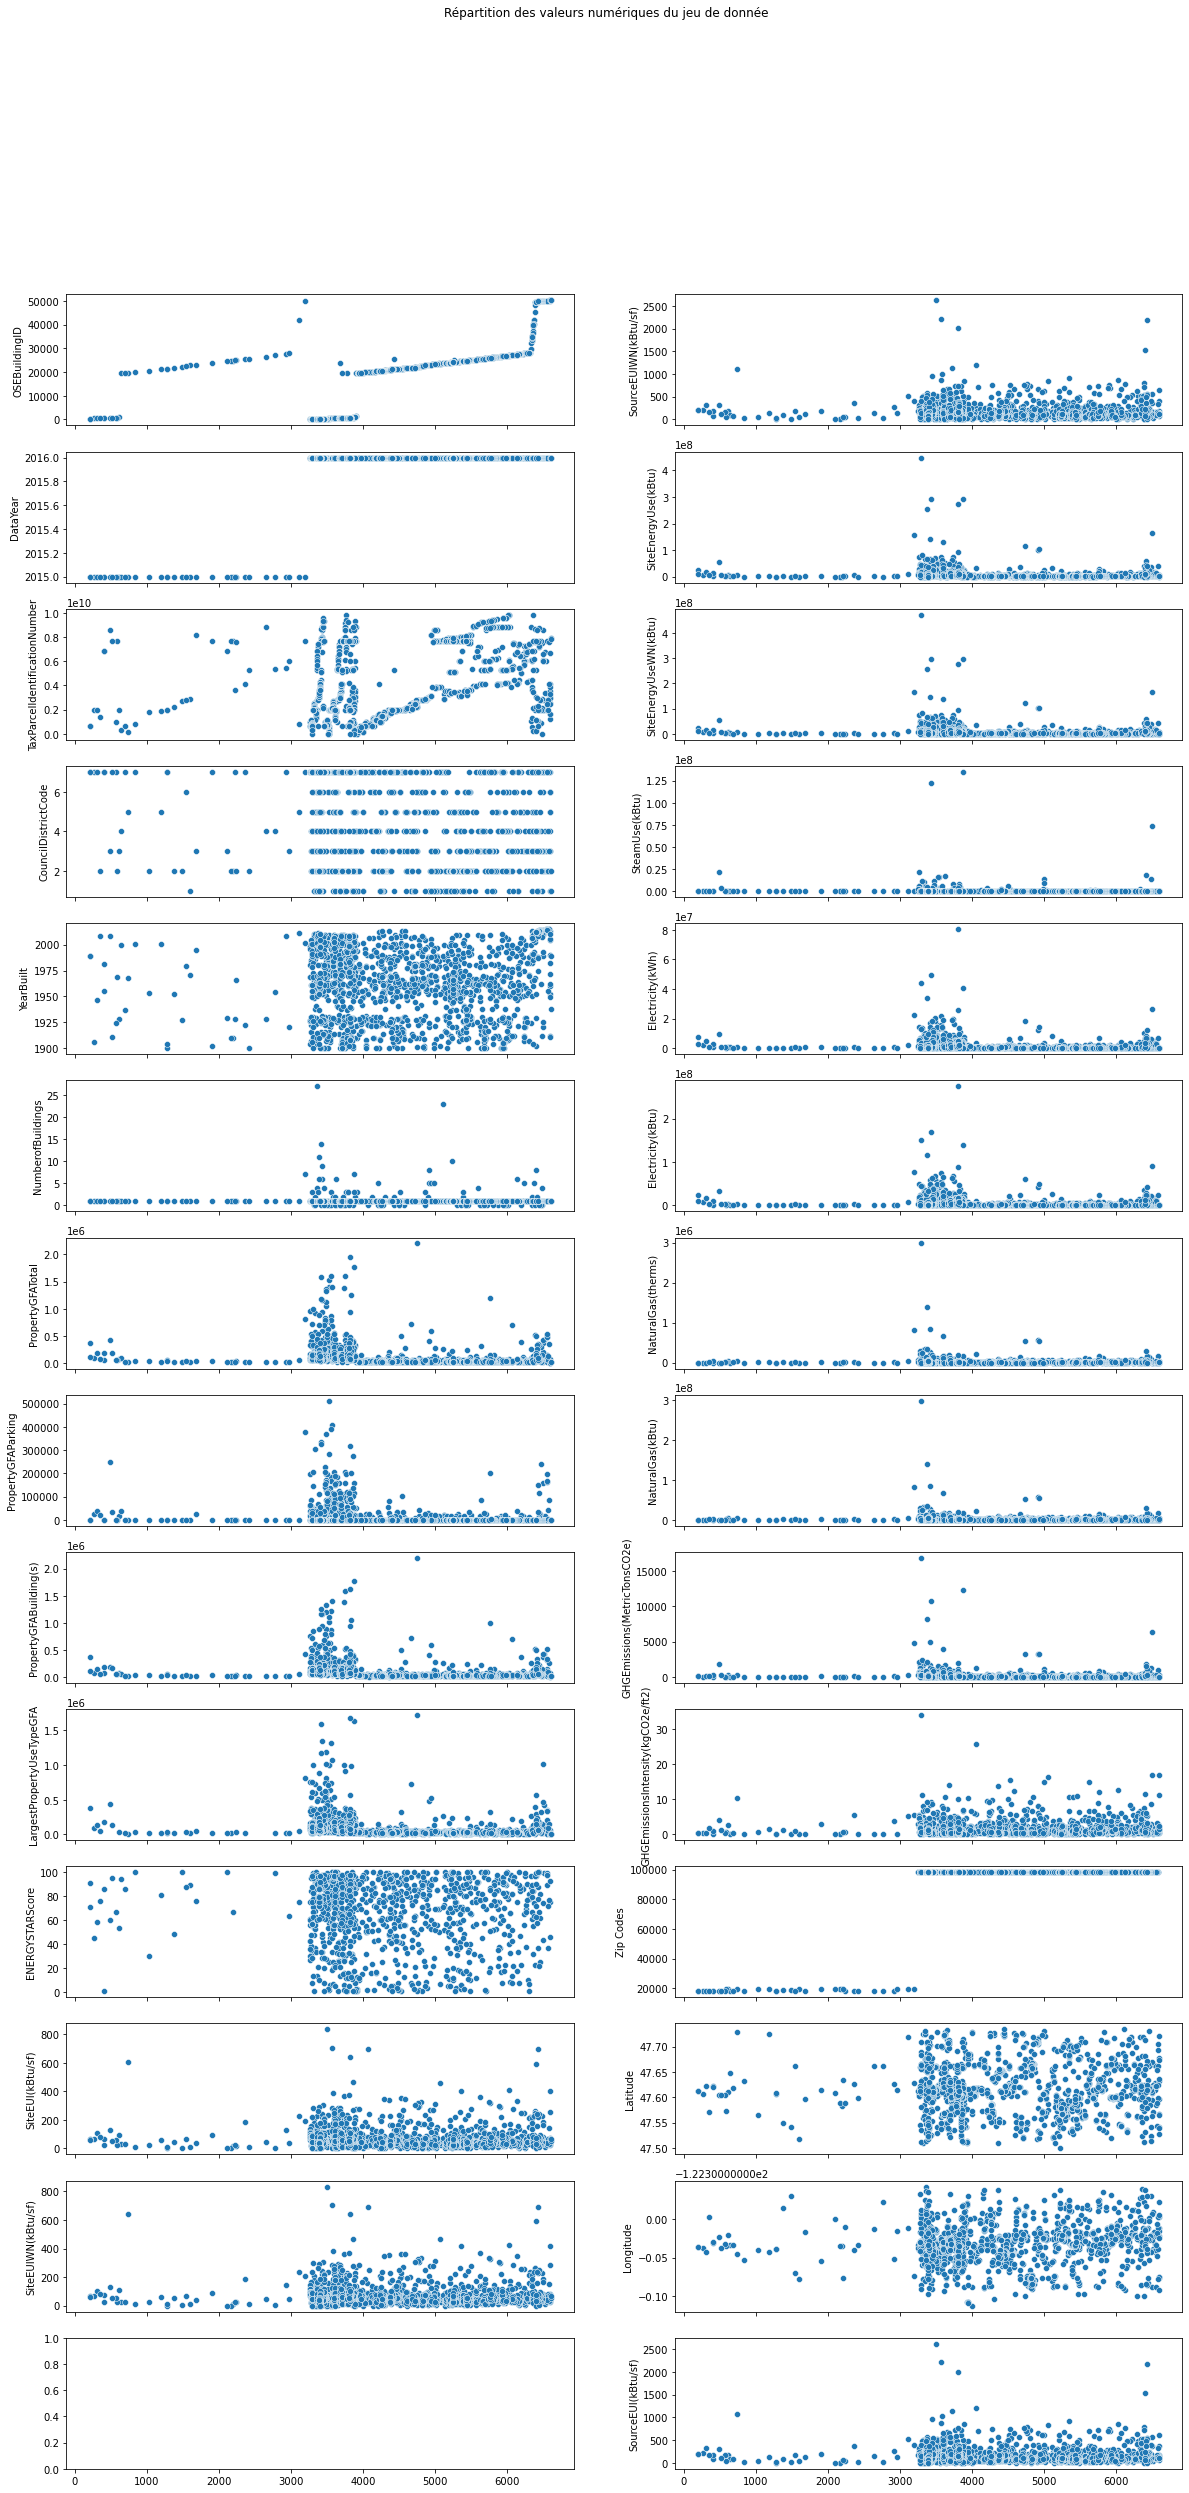

In [90]:
fig, ax = plt.subplots(14,2,figsize=(20,40), sharex=True)
plt.suptitle("Répartition des valeurs numériques du jeu de donnée")
j=0
for i in range(len(num)):
    k=i
    if i>=len(num)//2:
        j=1
        k=i-14
    t = sn.scatterplot(data=df[num[i]], ax=ax[k,j])  

On observe que pour certaines colonnes des valeurs peuvent s'écarter fortement des autres.

In [91]:
df['Electricity(kBtu)'].nlargest(10)

3810    274532495.0
3426    168683602.0
3291    150476283.0
3870    139354828.0
3380    115641210.0
6490     90060497.0
3811     87851862.0
3192     76742000.0
3564     74917352.0
3486     68636822.0
Name: Electricity(kBtu), dtype: float64

In [92]:
df.loc[df['Electricity(kBtu)'].nlargest(10).index]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,ComplianceStatus,Zip Codes,Latitude,Longitude,Address
3810,753,2016,NonResidential,Other,WestinBuilding,659000950,7,Downtown,1981,1.0,33,429405,0,429405,"Data Center, Office",Data Center,218997.0,98.0,639.700012,639.799988,2007.900024,2008.000000,274682208.0,274725984.0,0.0,80460872.0,274532495.0,1.496720e+03,149672.0,1921.82,4.48,No,Compliant,98121.0,47.614380,-122.338710,2001 6th Ave
3426,276,2016,NonResidential,Hospital,Harborview Medical Center,8590900220,3,East,2000,9.0,8,1158691,0,1158691,"Hospital (General Medical & Surgical), Parking",Hospital (General Medical & Surgical),1350182.0,29.0,217.100006,219.699997,502.899994,502.799988,293090784.0,296671744.0,122575032.0,49438336.0,168683602.0,1.832129e+04,1832129.0,10734.57,9.26,No,Compliant,98104.0,47.603990,-122.323770,325 9th Ave.
3291,43,2016,Campus,Mixed Use Property,Plant 2 Site,22000005,2,Greater Duwamish,1992,1.0,3,494835,0,494835,"Energy/Power Station, Laboratory, Manufacturin...",Office,757027.0,8.0,221.699997,233.100006,388.200012,400.299988,448385312.0,471613856.0,0.0,44102076.0,150476283.0,2.979090e+06,297909000.0,16870.98,34.09,No,Compliant,98108.0,47.534930,-122.317880,7755 E MARGINAL WAY S
3870,828,2016,NonResidential,Hospital,Swedish First Hill,1978201096,3,East,1994,7.0,14,1765970,0,1765970,"Hospital (General Medical & Surgical), Parking",Hospital (General Medical & Surgical),1639334.0,54.0,177.899994,180.500000,377.000000,378.399994,291614432.0,295929888.0,134943456.0,40842564.0,139354828.0,1.731612e+05,17316120.0,12307.16,6.97,No,Compliant,98122.0,47.608951,-122.322402,747 Broadway
3380,198,2016,NonResidential,Hospital,Seattle Children's Hospital Main Campus,2982800005,4,Northeast,1953,6.0,10,879000,0,879000,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),879000.0,10.0,288.799988,293.200012,578.200012,576.599976,253832464.0,257764208.0,0.0,33892500.0,115641210.0,1.381912e+06,138191238.0,8145.52,9.27,No,Compliant,98105.0,47.662310,-122.281460,4800 Sand Point Way NE
6490,49940,2016,NonResidential,Hospital,Virginia Mason Medical Center - 2149,1979200210,3,East,1920,1.0,8,374466,0,374466,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),1010135.0,74.0,162.300003,165.500000,367.899994,369.399994,163945984.0,167207104.0,73885472.0,26395222.0,90060497.0,0.000000e+00,0.0,6330.91,16.91,No,Compliant,98101.0,47.609860,-122.327740,925 Seneca St.
3811,775,2016,NonResidential,Large Office,Columbia Center - 2015,942000640,7,Downtown,1985,1.0,76,1952220,319400,1632820,"Office, Parking",Office,1680937.0,86.0,55.299999,55.099998,167.300003,166.500000,92937640.0,92537256.0,0.0,25747908.0,87851862.0,5.085763e+04,5085763.0,882.56,0.45,No,Compliant,98104.0,47.604540,-122.330720,701 5th Avenue
3192,49859,2015,Campus,Other,AMGEN INC. MASTER CAMPUS,7666201725,7,Magnolia / Queen Anne,2002,7.0,4,808520,376000,432520,Other,Other,808520.0,NaN,194.900000,206.000000,403.000000,414.600000,157606480.0,166523440.0,0.0,22490860.0,76742000.0,8.086760e+05,80867644.0,4829.86,5.57,No,Compliant,19575.0,47.628112,-122.374265,1201 AMGEN CT W
3564,440,2016,NonResidential,Mixed Use Property,Fisher Plaza - West Building,1991200170,7,Lake Union,2001,1.0,6,213834,104922,108912,"Data Center, Financial Office, Office, Other, ...",Parking,104922.0,100.0,707.299988,707.299988,2217.800049,2217.800049,75073888.0,75073888.0,0.0,21957020.0,74917352.0,1.565250e+0

In [93]:
df['Zip Codes'].unique()

array([17919., 19581., 19576., 18081., 19582., 18800., 18386., 18383.,
       18390., 19578., 19579., 19575., 19584., 18379., 18388., 18377.,
       98102., 98136., 98108., 98106., 98118., 98134., 98119., 98126.,
       98121., 98104., 98117., 98103., 98122., 98144., 98115., 98116.,
       98101., 98146., 98105., 98133., 98109., 98125., 98199., 98112.,
       98011., 98165., 98113., 98178., 98107., 98114.,    nan, 98020.,
       98177., 98155., 98124., 98195., 98013., 98145., 98111., 98181.,
       98164., 98154., 98185., 98168., 98033., 98070., 98191., 98053.,
       98006.])

Il y a un problème avec la saisie des codes postaux

### Nouvelles variables

Nous allons créer une variable age grace aux deux variables Année de construction et Année du Dataset.

In [94]:
df['BuildingAge'] = (df['DataYear'] - df['YearBuilt'])

In [95]:
df['BuildingAge']

1683     20
1593     44
1901    113
1276    115
1275    111
       ... 
3806     41
3805    114
3804     42
3814     87
6599     78
Name: BuildingAge, Length: 1595, dtype: int64

***

## Analyse exploratoire

In [96]:
num_features = ['BuildingAge', 'NumberofBuildings', 'PropertyGFATotal', 'PropertyGFABuilding(s)', 'PropertyGFAParking', 'LargestPropertyUseTypeGFA', 'ENERGYSTARScore']
tar_features = ['SiteEnergyUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)']

### Analyse univariée

In [97]:
def myCountplot(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

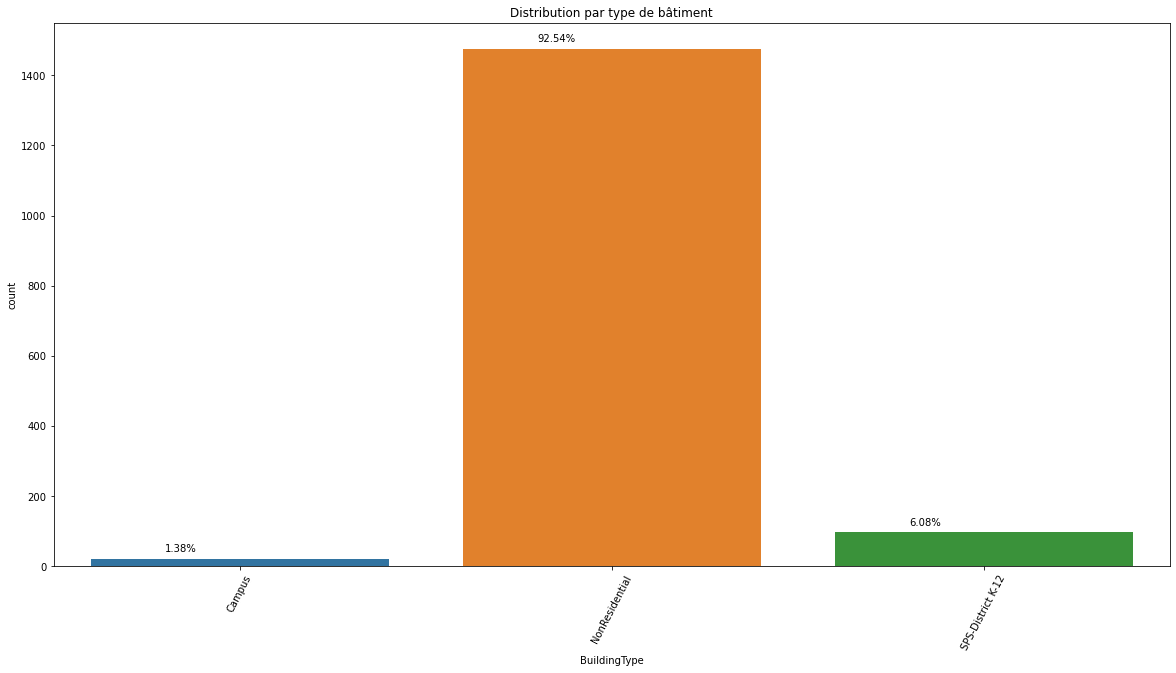

In [98]:
fig = plt.figure(figsize=(20,10))
order = np.sort(df['BuildingType'].unique())

g = sn.countplot(x="BuildingType", data=df, order=order)
plt.title("Distribution par type de bâtiment")
plt.xticks(range(0,len(order)),order,rotation=62.5,ha='center')

for p in g.patches:
    txt = str(round(100*p.get_height()/len(df),2)) + '%'
    txt_x = p.get_x() + p.get_width()/4
    txt_y = p.get_height()+20
    g.text(txt_x,txt_y,txt)

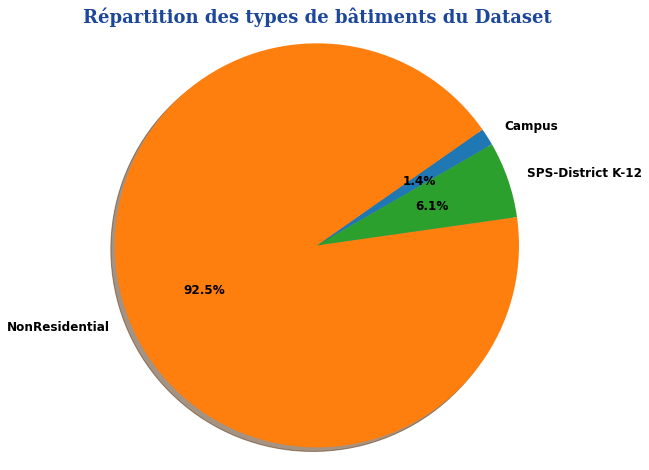

In [99]:
building_type = df.groupby(by='BuildingType')['OSEBuildingID'].nunique()

font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(building_type.values, labels=building_type.index, 
       autopct='%1.1f%%', shadow=True, startangle=30,
       textprops=dict(color="black",size=12, weight="bold"))
ax.axis('equal')
ax.set_title("Répartition des types de bâtiments du Dataset", fontdict=font_title)
plt.show()

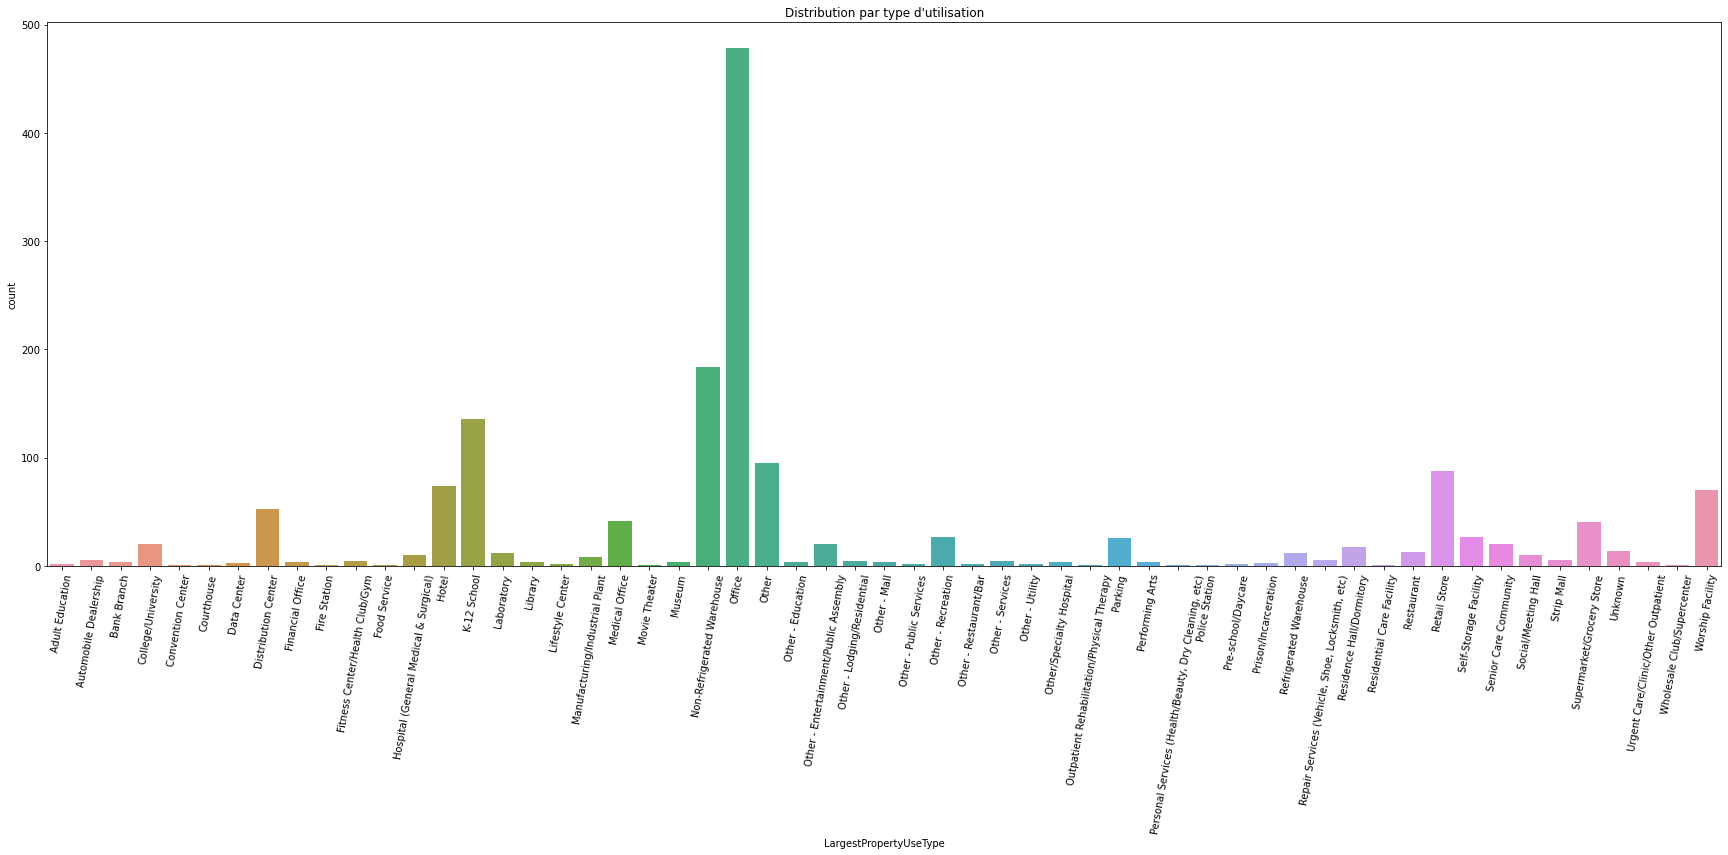

In [100]:
fig = plt.figure(figsize=(30,10))
order = np.sort(df['LargestPropertyUseType'].unique())

g = sn.countplot(x="LargestPropertyUseType", data=df, order=order)
plt.title("Distribution par type d'utilisation")
t = plt.xticks(range(0,len(order)),order,rotation=80,ha='center')

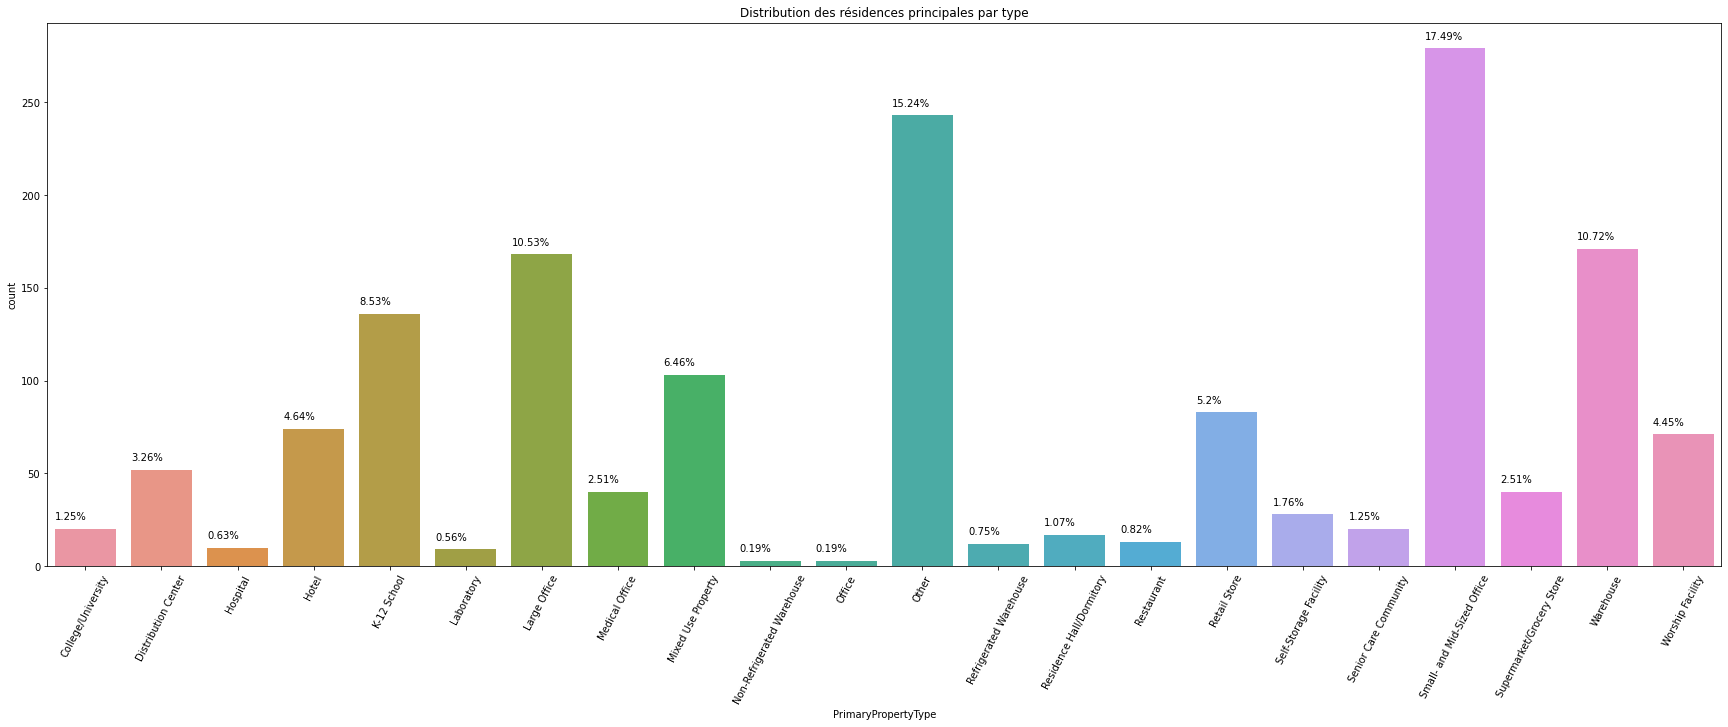

In [101]:
fig = plt.figure(figsize=(30,10))
order = np.sort(df['PrimaryPropertyType'].unique())

g = sn.countplot(x="PrimaryPropertyType", data=df, order=order)
plt.title("Distribution des résidences principales par type")
plt.xticks(range(0,len(order)),order,rotation=62.5,ha='center')

for p in g.patches:
    txt = str(round(100*p.get_height()/len(df),2)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()+5
    g.text(txt_x,txt_y,txt)

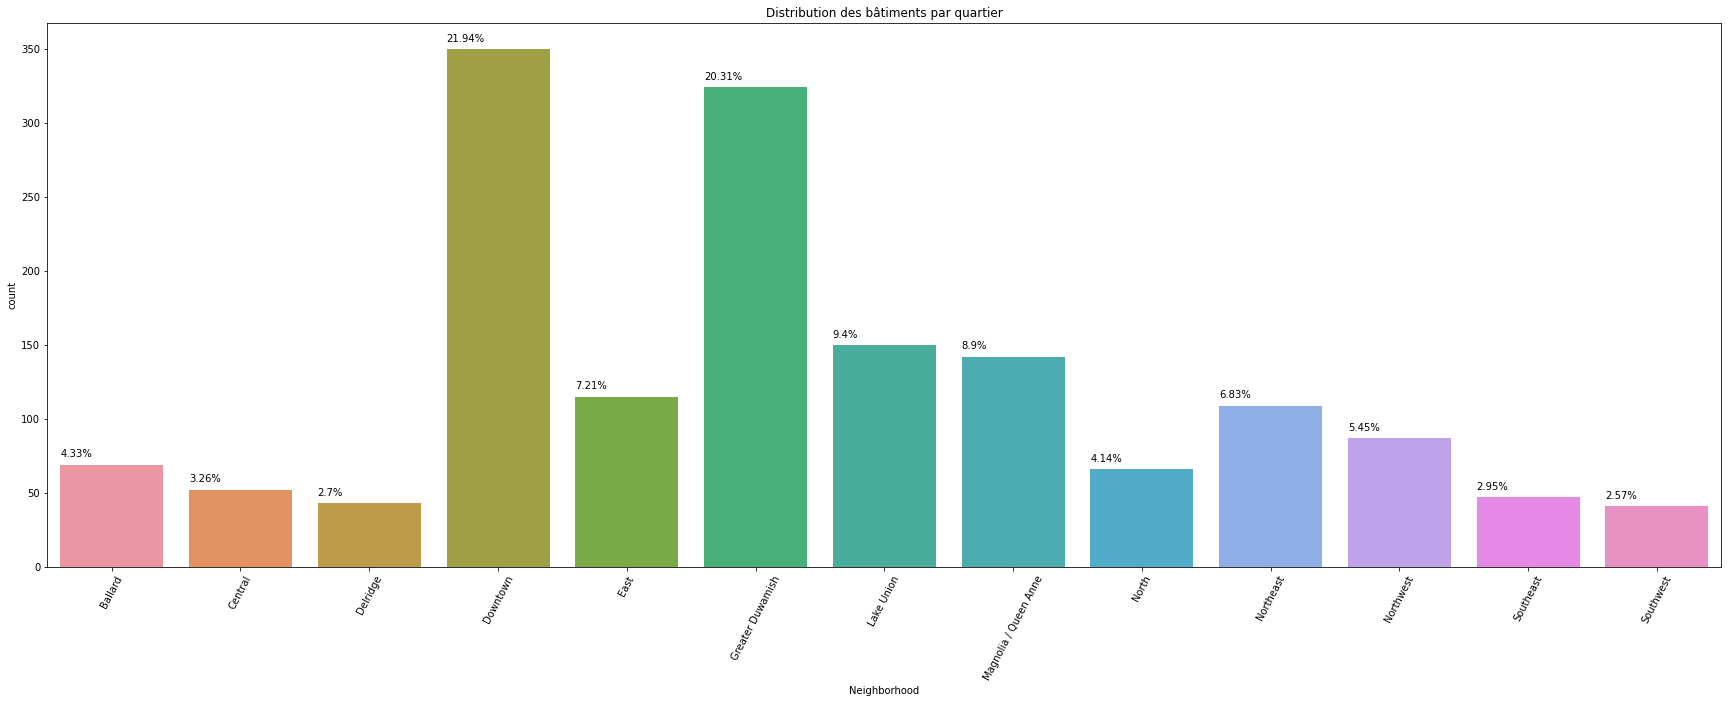

In [102]:
fig = plt.figure(figsize=(30,10))
order = np.sort(df['Neighborhood'].unique())

g = sn.countplot(x="Neighborhood", data=df, order=order)
plt.title("Distribution des bâtiments par quartier")
plt.xticks(range(0,len(order)),order,rotation=62.5,ha='center')

for p in g.patches:
    txt = str(round(100*p.get_height()/len(df),2)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()+5
    g.text(txt_x,txt_y,txt)

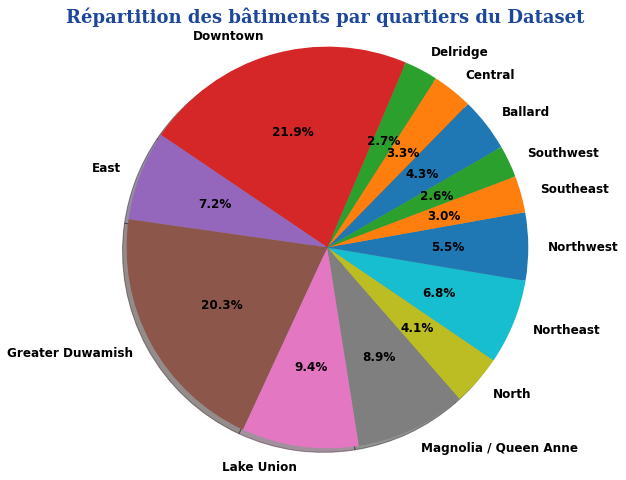

In [103]:
building_type = df.groupby(by='Neighborhood')['OSEBuildingID'].nunique()

font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(building_type.values, labels=building_type.index, 
       autopct='%1.1f%%', shadow=True, startangle=30,
       textprops=dict(color="black",size=12, weight="bold"))
ax.axis('equal')
ax.set_title("Répartition des bâtiments par quartiers du Dataset", fontdict=font_title)
plt.show()

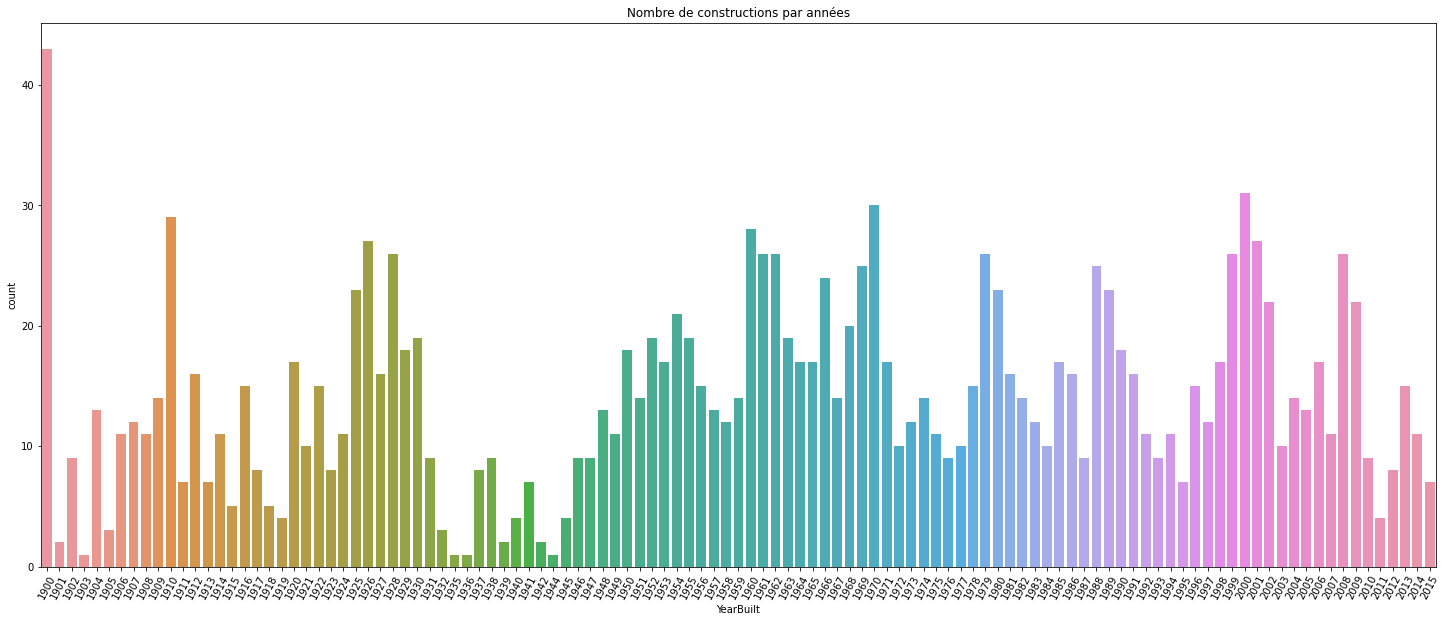

In [104]:
fig = plt.figure(figsize=(25,10))
order = np.sort(df['YearBuilt'].unique())

g = sn.countplot(x="YearBuilt", data=df, order=order)
plt.title("Nombre de constructions par années")
_=plt.xticks(range(0,len(order)),order,rotation=62.5,ha='center')

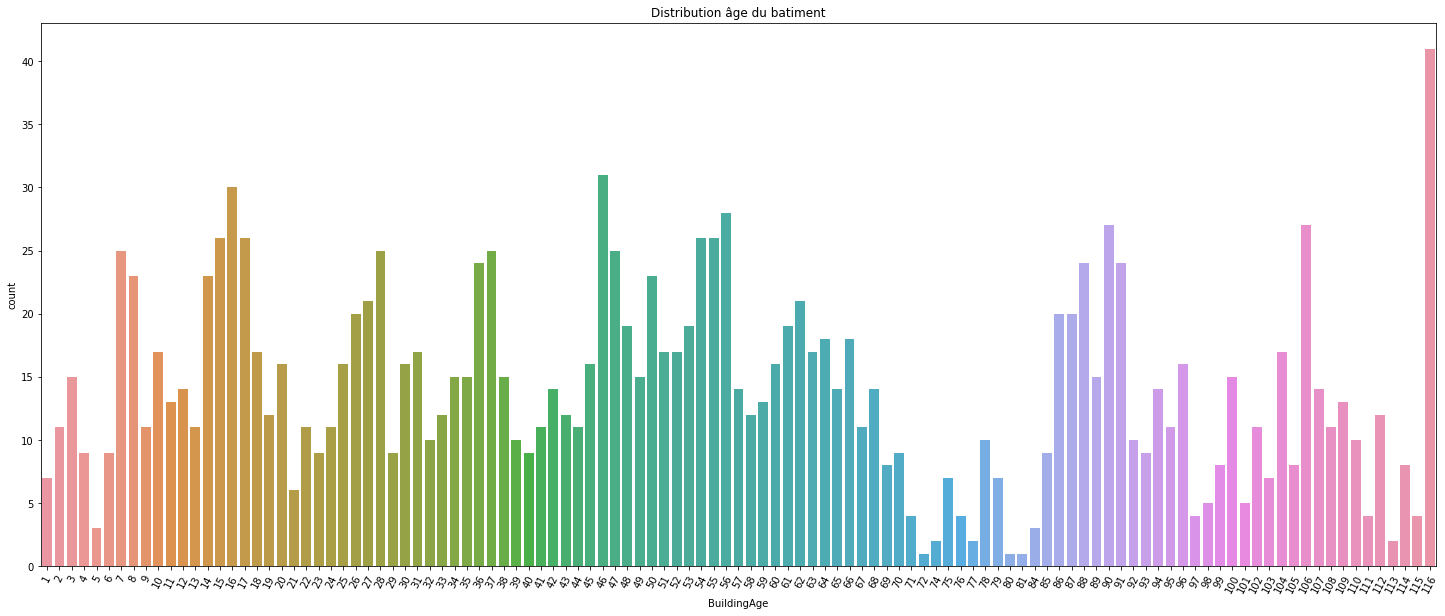

In [105]:
fig = plt.figure(figsize=(25,10))
order = np.sort(df['BuildingAge'].unique())

g = sn.countplot(x="BuildingAge", data=df, order=order)
plt.title("Distribution âge du batiment")
_=plt.xticks(range(0,len(order)),order,rotation=62.5,ha='center')

Nous pouvons observer que :
* Les types de bâtiments sont inégalement représentés, il y a essentiellement des résidences
* Certains quartiers sont peu représentés
* Pendant la seconde guerre mondiale, la construction de bâtiments a été fortement diminuée
***

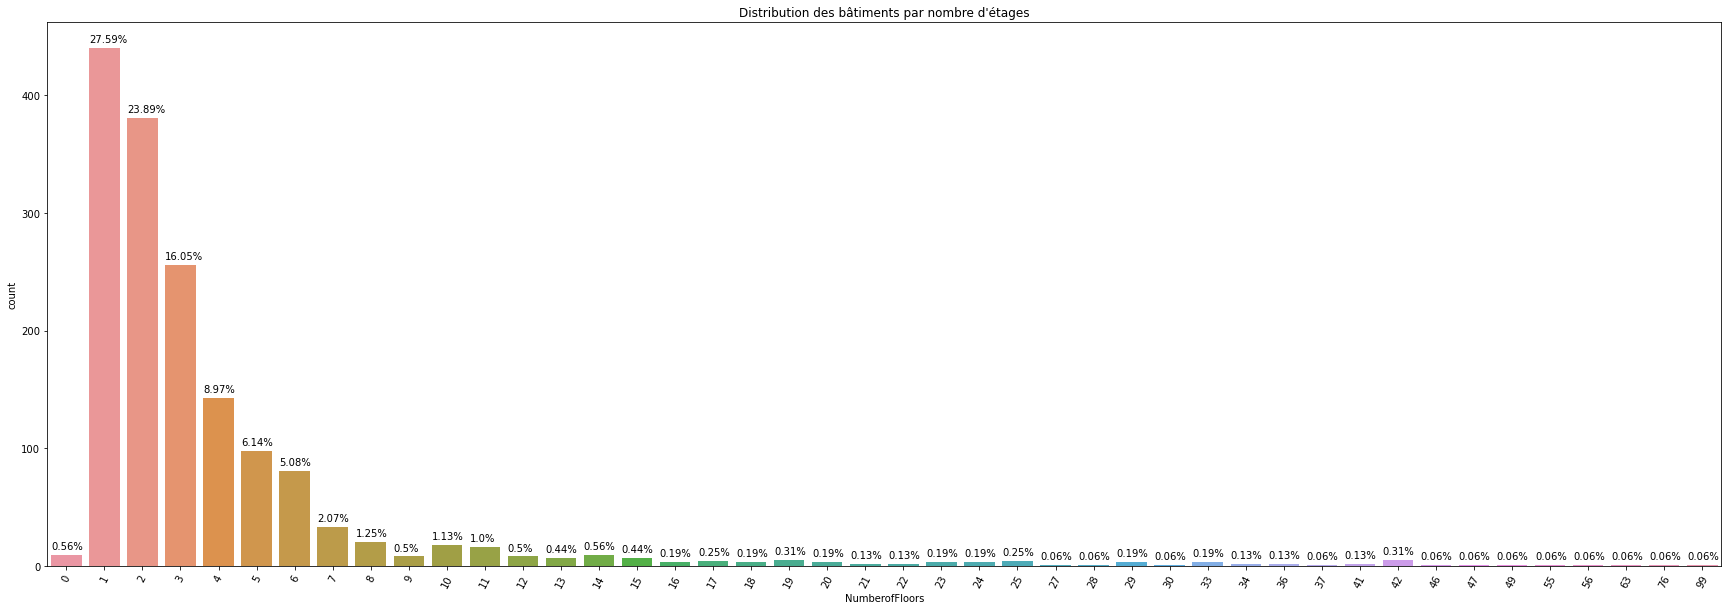

In [106]:
fig = plt.figure(figsize=(30,10))
order = np.sort(df['NumberofFloors'].unique())

g = sn.countplot(x="NumberofFloors", data=df, order=order)
plt.title("Distribution des bâtiments par nombre d'étages")
_ = plt.xticks(range(0,len(order)),order,rotation=62.5,ha='center')

for p in g.patches:
    txt = str(round(100*p.get_height()/len(df),2)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()+5
    g.text(txt_x,txt_y,txt)

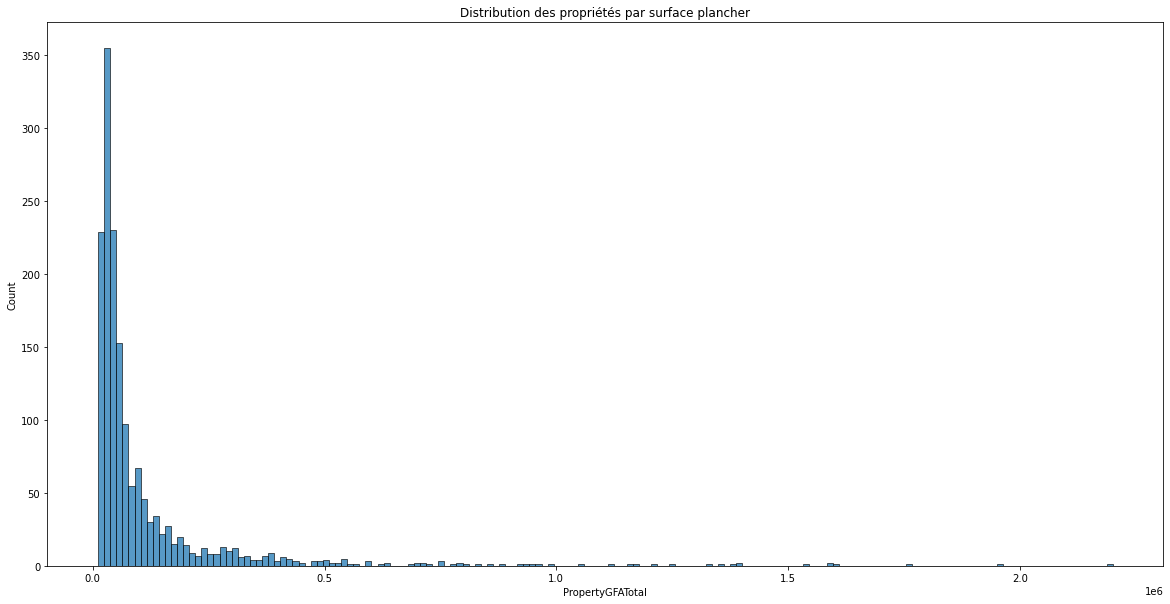

In [107]:
fig = plt.figure(figsize=(20,10))

g = sn.histplot(x="PropertyGFATotal", data=df)
_ = plt.title("Distribution des propriétés par surface plancher")

Nous pouvons observer que :
* Il y a plus de bâtiments avec  peu de surface plancher
* De manière générale les bâtiments consomment peu
* Il y a peu de bâtiments qui consomment énormément d'energie
* Le même constat peut être fait pour l'emission de CO2

### Analyse multivariée

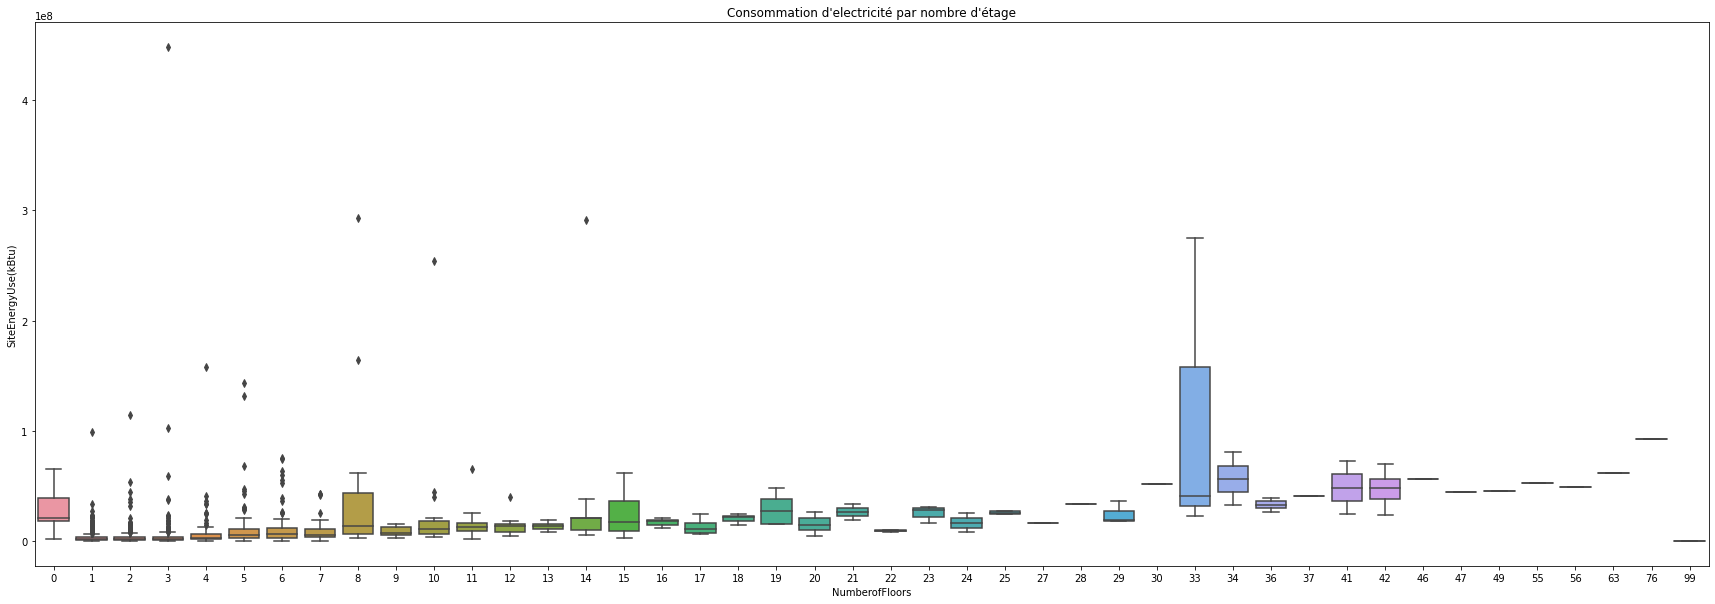

In [108]:
figg = plt.figure(figsize=(30,10))
order = np.sort(df['NumberofFloors'].unique())

_ = sn.boxplot(x='NumberofFloors', y = 'SiteEnergyUse(kBtu)', data=df).set_title("Consommation d'electricité par nombre d'étage")

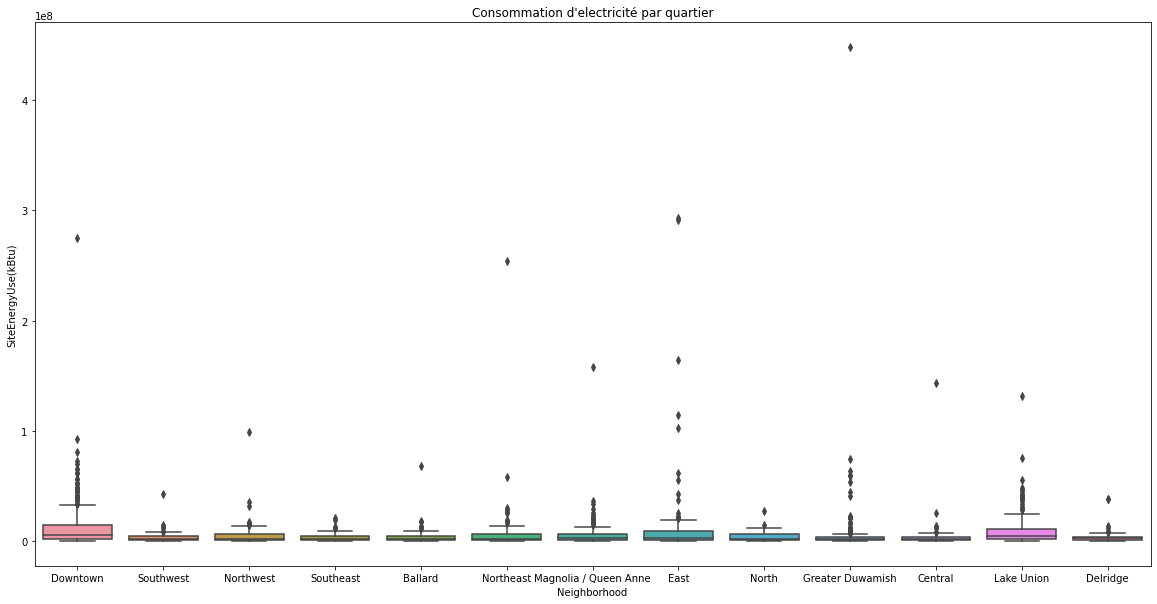

In [109]:
figg = plt.figure(figsize=(20,10))
order = np.sort(df['NumberofFloors'].unique())

_ = sn.boxplot(x='Neighborhood', y = 'SiteEnergyUse(kBtu)', data=df).set_title("Consommation d'electricité par quartier")

Plus un batiment possède des étages, plus sa consommation en énergie est importante

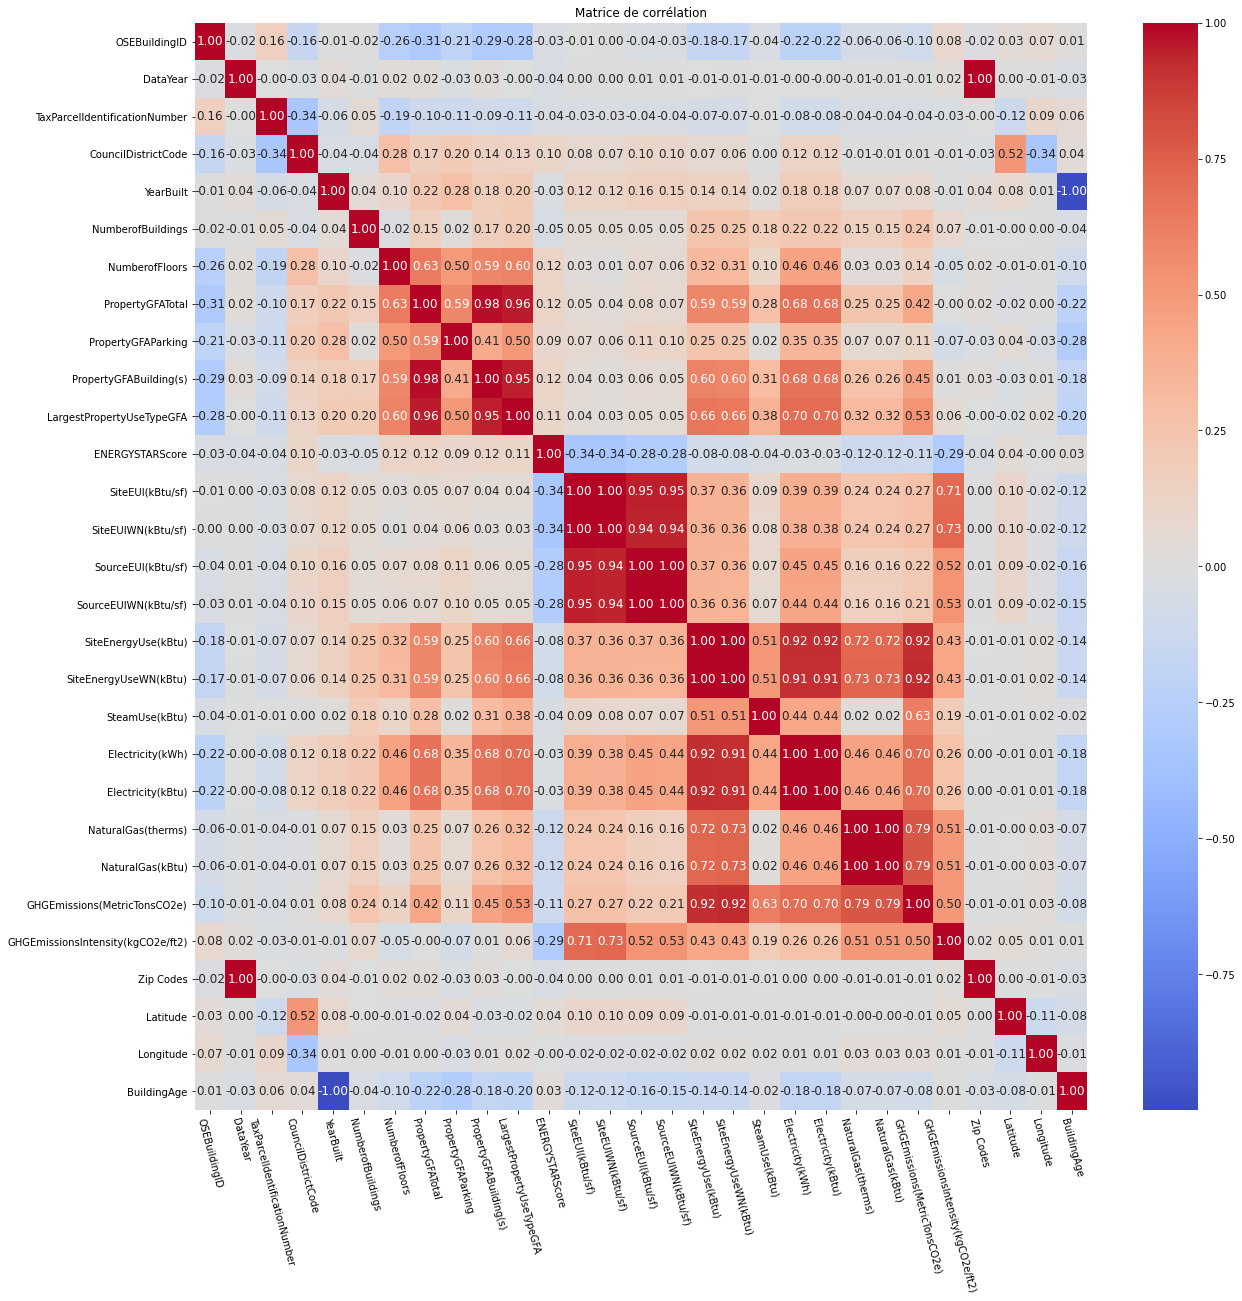

In [110]:
plt.figure(figsize=(20,20))
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
_ = sn.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':12},center=0, cmap="coolwarm").set_title("Matrice de corrélation")
_ = plt.xticks(rotation=-75)
plt.savefig("corrmap.png")

In [111]:
tar_features

['SiteEnergyUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)']

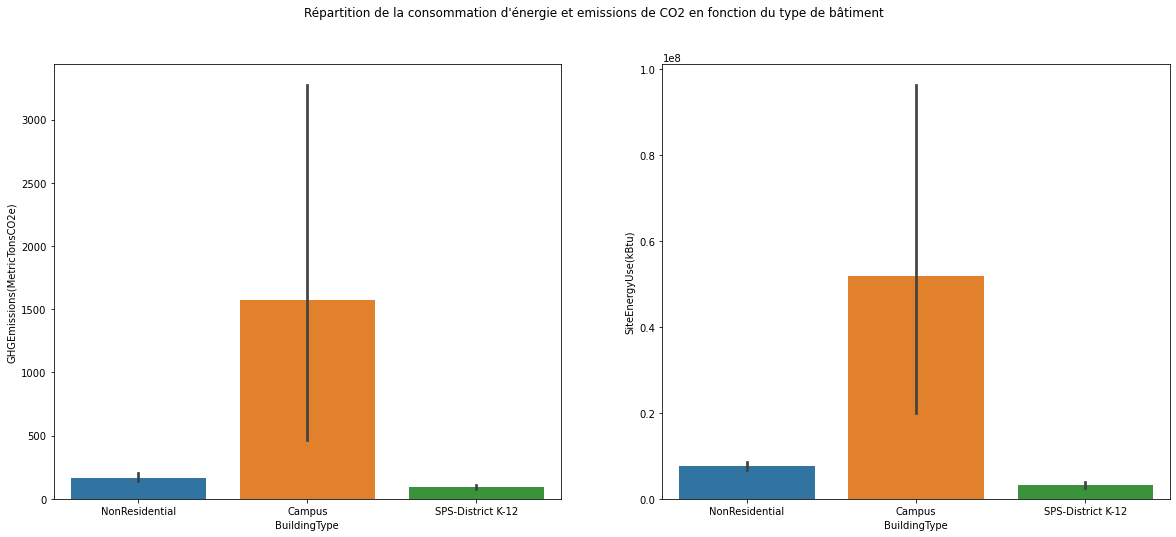

In [112]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sn.barplot(x='BuildingType',y='GHGEmissions(MetricTonsCO2e)',data=df, ax=axes[0])
sn.barplot(x='BuildingType',y='SiteEnergyUse(kBtu)',data=df, ax=axes[1])
plt.suptitle("Répartition de la consommation d'énergie et emissions de CO2 en fonction du type de bâtiment")
plt.show()

In [113]:
bins = pd.IntervalIndex.from_tuples([(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), 
                                     (50, 60), (60, 70), (70,80), (80,90), (90,100), 
                                     (100,110), (110,120)])

<Figure size 1080x720 with 0 Axes>

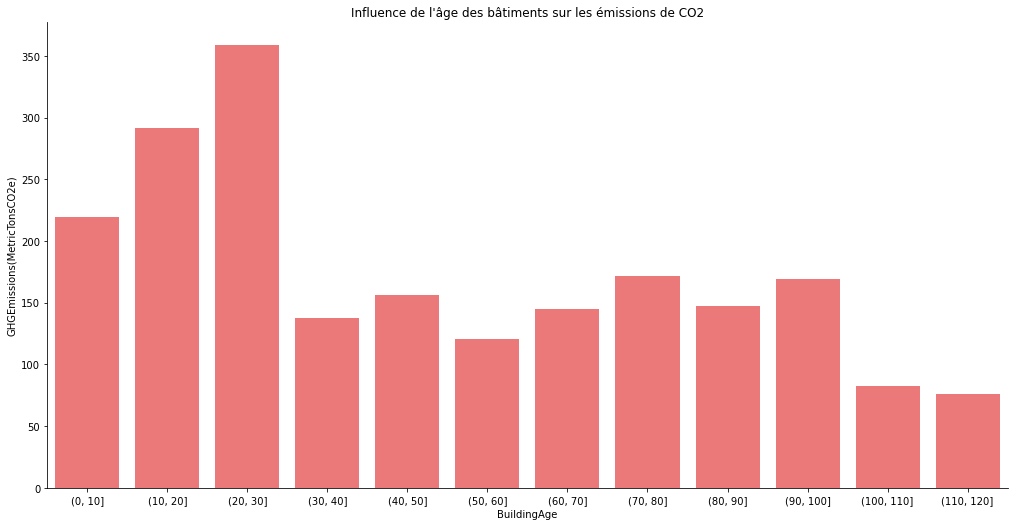

In [114]:
_= plt.figure(figsize=(15,10))
_ = sn.catplot(
    data=df, kind="bar",
    x=pd.cut(df['BuildingAge'], bins=bins), y='GHGEmissions(MetricTonsCO2e)',
    ci=None, color="red", alpha=.6,
    height=7, aspect=2
)
_= plt.title("Influence de l'âge des bâtiments sur les émissions de CO2")

<Figure size 1080x720 with 0 Axes>

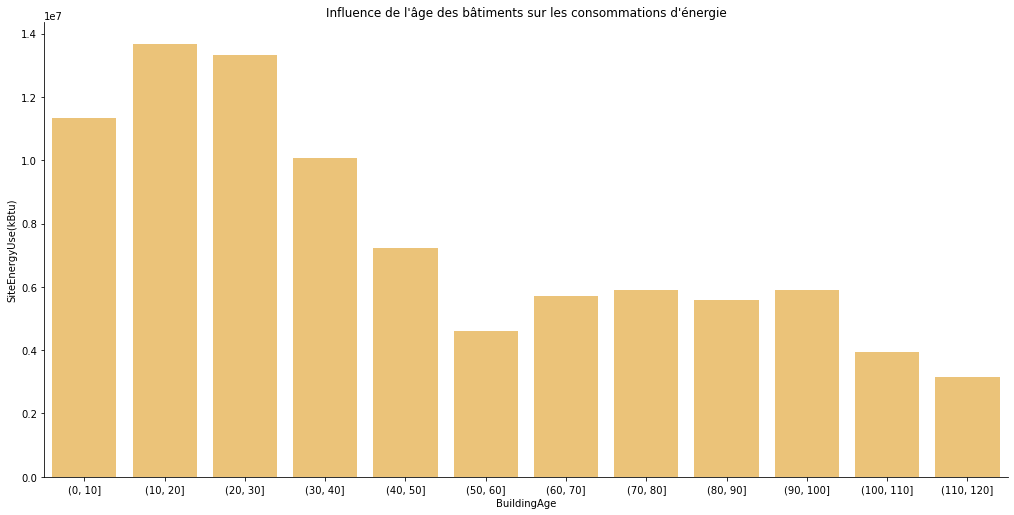

In [115]:
plt.figure(figsize=(15,10))
sn.catplot(
    data=df, kind="bar",
    x=pd.cut(df['BuildingAge'], bins=bins), y="SiteEnergyUse(kBtu)",
    ci=None, color="orange", alpha=.6,
    height=7, aspect=2
)
plt.title("Influence de l'âge des bâtiments sur les consommations d'énergie")
plt.show()

In [116]:
df[cat_features]

,BuildingType,LargestPropertyUseType,Neighborhood,PrimaryPropertyType
1683,NonResidential,Medical Office,Downtown,Medical Office
1593,NonResidential,Worship Facility,Southwest,Worship Facility
1901,NonResidential,Restaurant,Downtown,Restaurant
1276,NonResidential,Other,Downtown,Other
1275,NonResidential,Other,Downtown,Other
...,...,...,...,...
3806,NonResidential,Office,Downtown,Large Office
3805,NonResidential,Office,Downtown,Small- and Mid-Sized Office
3804,NonResidential,Office,Magnolia / Queen Anne,Large Office
3814,NonResidential,Retail Store,Downtown,Retail Store


## Jeu de données final

In [117]:
y = pd.get_dummies(df[cat_features])
y.head()

,BuildingType_Campus,BuildingType_NonResidential,BuildingType_SPS-District K-12,LargestPropertyUseType_Adult Education,LargestPropertyUseType_Automobile Dealership,LargestPropertyUseType_Bank Branch,LargestPropertyUseType_College/University,LargestPropertyUseType_Convention Center,LargestPropertyUseType_Courthouse,LargestPropertyUseType_Data Center,LargestPropertyUseType_Distribution Center,LargestPropertyUseType_Financial Office,LargestPropertyUseType_Fire Station,LargestPropertyUseType_Fitness Center/Health Club/Gym,LargestPropertyUseType_Food Service,LargestPropertyUseType_Hospital (General Medical & Surgical),LargestPropertyUseType_Hotel,LargestPropertyUseType_K-12 School,LargestPropertyUseType_Laboratory,LargestPropertyUseType_Library,LargestPropertyUseType_Lifestyle Center,LargestPropertyUseType_Manufacturing/Industrial Plant,LargestPropertyUseType_Medical Office,LargestPropertyUseType_Movie Theater,LargestPropertyUseType_Museum,LargestPropertyUseType_Non-Refrigerated Warehouse,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Other - Education,LargestPropertyUseType_Other - Entertainment/Public Assembly,LargestPropertyUseType_Other - Lodging/Residential,LargestPropertyUseType_Other - Mall,LargestPropertyUseType_Other - Public Services,LargestPropertyUseType_Other - Recreation,LargestPropertyUseType_Other - Restaurant/Bar,LargestPropertyUseType_Other - Services,LargestPropertyUseType_Other - Utility,LargestPropertyUseType_Other/Specialty Hospital,LargestPropertyUseType_Outpatient Rehabilitation/Physical Therapy,LargestPropertyUseType_Parking,LargestPropertyUseType_Performing Arts,"LargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",LargestPropertyUseType_Police Station,LargestPropertyUseType_Pre-school/Daycare,LargestPropertyUseType_Prison/Incarceration,LargestPropertyUseType_Refrigerated Warehouse,"LargestPropertyUseType_Repair Services (Vehicle, Shoe, Locksmith, etc)",LargestPropertyUseType_Residence Hall/Dormitory,LargestPropertyUseType_Residential Care Facility,LargestPropertyUseType_Restaurant,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Social/Meeting Hall,LargestPropertyUseType_Strip Mall,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Unknown,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater Duwamish,Neighborhood_Lake Union,Neighborhood_Magnolia / Queen Anne,Neighborhood_North,Neighborhood_Northeast,Neighborhood_Northwest,Neighborhood_Southeast,Neighborhood_Southwest,PrimaryPropertyType_College/University,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Non-Refrigerated Warehouse,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall/Dormitory,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket/Grocery Store,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility
1683,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1593,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,

In [118]:
df[num_features].head()

,BuildingAge,NumberofBuildings,PropertyGFATotal,PropertyGFABuilding(s),PropertyGFAParking,LargestPropertyUseTypeGFA,ENERGYSTARScore
1683,20,1.0,43813,20727,23086,45145.0,76.0
1593,44,1.0,23772,23772,0,23772.0,89.0
1901,113,1.0,40320,40320,0,24514.0,NaN
1276,115,1.0,49760,49760,0,24019.0,NaN
1275,111,1.0,44928,44928,0,38706.0,NaN


In [119]:
df[num_features] = df[num_features].fillna(df[num_features].mean())
mydf = pd.concat([y, df[num_features]],axis=1)
mydf.head()

,BuildingType_Campus,BuildingType_NonResidential,BuildingType_SPS-District K-12,LargestPropertyUseType_Adult Education,LargestPropertyUseType_Automobile Dealership,LargestPropertyUseType_Bank Branch,LargestPropertyUseType_College/University,LargestPropertyUseType_Convention Center,LargestPropertyUseType_Courthouse,LargestPropertyUseType_Data Center,LargestPropertyUseType_Distribution Center,LargestPropertyUseType_Financial Office,LargestPropertyUseType_Fire Station,LargestPropertyUseType_Fitness Center/Health Club/Gym,LargestPropertyUseType_Food Service,LargestPropertyUseType_Hospital (General Medical & Surgical),LargestPropertyUseType_Hotel,LargestPropertyUseType_K-12 School,LargestPropertyUseType_Laboratory,LargestPropertyUseType_Library,LargestPropertyUseType_Lifestyle Center,LargestPropertyUseType_Manufacturing/Industrial Plant,LargestPropertyUseType_Medical Office,LargestPropertyUseType_Movie Theater,LargestPropertyUseType_Museum,LargestPropertyUseType_Non-Refrigerated Warehouse,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Other - Education,LargestPropertyUseType_Other - Entertainment/Public Assembly,LargestPropertyUseType_Other - Lodging/Residential,LargestPropertyUseType_Other - Mall,LargestPropertyUseType_Other - Public Services,LargestPropertyUseType_Other - Recreation,LargestPropertyUseType_Other - Restaurant/Bar,LargestPropertyUseType_Other - Services,LargestPropertyUseType_Other - Utility,LargestPropertyUseType_Other/Specialty Hospital,LargestPropertyUseType_Outpatient Rehabilitation/Physical Therapy,LargestPropertyUseType_Parking,LargestPropertyUseType_Performing Arts,"LargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",LargestPropertyUseType_Police Station,LargestPropertyUseType_Pre-school/Daycare,LargestPropertyUseType_Prison/Incarceration,LargestPropertyUseType_Refrigerated Warehouse,"LargestPropertyUseType_Repair Services (Vehicle, Shoe, Locksmith, etc)",LargestPropertyUseType_Residence Hall/Dormitory,LargestPropertyUseType_Residential Care Facility,LargestPropertyUseType_Restaurant,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Social/Meeting Hall,LargestPropertyUseType_Strip Mall,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Unknown,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater Duwamish,Neighborhood_Lake Union,Neighborhood_Magnolia / Queen Anne,Neighborhood_North,Neighborhood_Northeast,Neighborhood_Northwest,Neighborhood_Southeast,Neighborhood_Southwest,PrimaryPropertyType_College/University,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Non-Refrigerated Warehouse,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall/Dormitory,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket/Grocery Store,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,BuildingAge,NumberofBuildings,PropertyGFATotal,PropertyGFABuilding(s),PropertyGFAParking,LargestPropertyUseTypeGFA,ENERGYSTARScore
1683,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,1.0,43813,20727,23086,45145.0,76.0000

In [120]:
mydf.shape

(1595, 102)

Le jeu nettoyé est composé de 1595 lignes, 102 colonnes.

In [121]:
mydf.to_csv("mydf.csv",index=False)

In [122]:
df[tar_features].to_csv("tar.csv",index=False)

## Valeurs à prédire

In [123]:
joint = [df15,df16]
df = pd.concat(joint,ignore_index=True)

In [124]:
tar_features

['SiteEnergyUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)']

In [125]:
df['SiteEnergyUse(kBtu)'].isnull().sum()

13

In [126]:
df['GHGEmissions(MetricTonsCO2e)'].isnull().sum()

17

In [127]:
missing_ele = df[df['SiteEnergyUse(kBtu)'].isnull()]['SiteEnergyUse(kBtu)']
missing_co2 = df[df['GHGEmissions(MetricTonsCO2e)'].isnull()]['GHGEmissions(MetricTonsCO2e)']

In [128]:
missing_ele.to_csv('ele.csv',index=False)
missing_co2.to_csv('co2.csv',index=False)